In [2245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import optuna
from optuna.samplers import TPESampler

In [2246]:
train = pd.read_csv(r'D:\Data Science\Credit card lead prediction\train.csv')
test = pd.read_csv(r'D:\Data Science\Credit card lead prediction\test.csv')
sample = pd.read_csv(r'D:\Data Science\Credit card lead prediction\sample_submission.csv')

In [2247]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [2248]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [2249]:
df = pd.concat([train, test], axis = 0)

In [2250]:
id = 'ID'
target = 'Is_Lead'

features = [col for col in train.columns if col not in [id, target]]

In [2251]:
df['Credit_Product'].fillna('999', inplace = True)

In [2252]:
# Label Encoding
le = LabelEncoder()

df[['Gender', 'Credit_Product', 'Is_Active','Occupation', 'Channel_Code', 'Region_Code']] = df[['Gender', 'Credit_Product', 'Is_Active','Occupation', 'Channel_Code', 'Region_Code']].apply(le.fit_transform)

In [2254]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:]
features_proc = [col for col in df.columns if col not in [id, target]]

---

In [2255]:
X = train_proc.drop(['Is_Lead', 'ID'], axis = 1)
y = train_proc['Is_Lead']

In [2256]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

---

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict_proba(X_val)[:,1]
print('Roc_auc_score is: ', roc_auc_score(y_val, lr_preds))
# 0.566208158771339

Roc_auc_score is:  0.566208158771339


In [354]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
dt_preds = dt.predict_proba(X_val)[:,1]
print('Roc_auc_score is: ', roc_auc_score(y_val, dt_preds))
# 0.7057159498141139

Roc_auc_score is:  0.7057159498141139


In [653]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [1995]:
cb = CatBoostClassifier(random_state = 1, cat_features = ['Region_Code', 'Occupation', 'Channel_Code', 'Gender','Credit_Product','Is_Active'])
cb.fit(X_train, y_train)
cb_preds = cb.predict_proba(X_val)[:, 1]
print('Roc_auc_score is: ', roc_auc_score(y_val, cb_preds))

Learning rate set to 0.095567
0:	learn: 0.6176810	total: 124ms	remaining: 2m 4s
1:	learn: 0.5573565	total: 242ms	remaining: 2m
2:	learn: 0.5112037	total: 366ms	remaining: 2m 1s
3:	learn: 0.4771499	total: 468ms	remaining: 1m 56s
4:	learn: 0.4502278	total: 563ms	remaining: 1m 51s
5:	learn: 0.4293497	total: 665ms	remaining: 1m 50s
6:	learn: 0.4132248	total: 767ms	remaining: 1m 48s
7:	learn: 0.4007156	total: 865ms	remaining: 1m 47s
8:	learn: 0.3905575	total: 961ms	remaining: 1m 45s
9:	learn: 0.3829198	total: 1.07s	remaining: 1m 45s
10:	learn: 0.3765055	total: 1.17s	remaining: 1m 45s
11:	learn: 0.3716187	total: 1.28s	remaining: 1m 45s
12:	learn: 0.3675660	total: 1.37s	remaining: 1m 43s
13:	learn: 0.3641604	total: 1.46s	remaining: 1m 42s
14:	learn: 0.3614607	total: 1.55s	remaining: 1m 41s
15:	learn: 0.3593423	total: 1.65s	remaining: 1m 41s
16:	learn: 0.3577218	total: 1.74s	remaining: 1m 40s
17:	learn: 0.3561264	total: 1.83s	remaining: 1m 39s
18:	learn: 0.3547807	total: 1.94s	remaining: 1m 40

157:	learn: 0.3420478	total: 19.1s	remaining: 1m 41s
158:	learn: 0.3420351	total: 19.2s	remaining: 1m 41s
159:	learn: 0.3420043	total: 19.3s	remaining: 1m 41s
160:	learn: 0.3419484	total: 19.4s	remaining: 1m 41s
161:	learn: 0.3419212	total: 19.6s	remaining: 1m 41s
162:	learn: 0.3419168	total: 19.7s	remaining: 1m 41s
163:	learn: 0.3419065	total: 19.8s	remaining: 1m 41s
164:	learn: 0.3418904	total: 19.9s	remaining: 1m 40s
165:	learn: 0.3418596	total: 20.1s	remaining: 1m 40s
166:	learn: 0.3418348	total: 20.2s	remaining: 1m 40s
167:	learn: 0.3418041	total: 20.4s	remaining: 1m 40s
168:	learn: 0.3417915	total: 20.5s	remaining: 1m 40s
169:	learn: 0.3417629	total: 20.7s	remaining: 1m 40s
170:	learn: 0.3417502	total: 20.8s	remaining: 1m 40s
171:	learn: 0.3417242	total: 21s	remaining: 1m 40s
172:	learn: 0.3417008	total: 21.1s	remaining: 1m 40s
173:	learn: 0.3416833	total: 21.2s	remaining: 1m 40s
174:	learn: 0.3416656	total: 21.4s	remaining: 1m 40s
175:	learn: 0.3416520	total: 21.5s	remaining: 1m

313:	learn: 0.3392843	total: 41.5s	remaining: 1m 30s
314:	learn: 0.3392749	total: 41.6s	remaining: 1m 30s
315:	learn: 0.3392394	total: 41.8s	remaining: 1m 30s
316:	learn: 0.3392282	total: 41.9s	remaining: 1m 30s
317:	learn: 0.3392046	total: 42.1s	remaining: 1m 30s
318:	learn: 0.3391830	total: 42.2s	remaining: 1m 30s
319:	learn: 0.3391653	total: 42.4s	remaining: 1m 30s
320:	learn: 0.3391503	total: 42.5s	remaining: 1m 29s
321:	learn: 0.3391331	total: 42.6s	remaining: 1m 29s
322:	learn: 0.3391239	total: 42.7s	remaining: 1m 29s
323:	learn: 0.3391202	total: 42.9s	remaining: 1m 29s
324:	learn: 0.3391015	total: 43s	remaining: 1m 29s
325:	learn: 0.3390913	total: 43.2s	remaining: 1m 29s
326:	learn: 0.3390846	total: 43.3s	remaining: 1m 29s
327:	learn: 0.3390651	total: 43.4s	remaining: 1m 29s
328:	learn: 0.3390377	total: 43.6s	remaining: 1m 28s
329:	learn: 0.3390358	total: 43.7s	remaining: 1m 28s
330:	learn: 0.3390205	total: 43.9s	remaining: 1m 28s
331:	learn: 0.3390134	total: 44.1s	remaining: 1m

469:	learn: 0.3370556	total: 1m 4s	remaining: 1m 12s
470:	learn: 0.3370363	total: 1m 4s	remaining: 1m 12s
471:	learn: 0.3370264	total: 1m 5s	remaining: 1m 12s
472:	learn: 0.3370151	total: 1m 5s	remaining: 1m 12s
473:	learn: 0.3370111	total: 1m 5s	remaining: 1m 12s
474:	learn: 0.3370081	total: 1m 5s	remaining: 1m 12s
475:	learn: 0.3369969	total: 1m 5s	remaining: 1m 12s
476:	learn: 0.3369819	total: 1m 5s	remaining: 1m 12s
477:	learn: 0.3369682	total: 1m 5s	remaining: 1m 11s
478:	learn: 0.3369536	total: 1m 6s	remaining: 1m 11s
479:	learn: 0.3369509	total: 1m 6s	remaining: 1m 11s
480:	learn: 0.3369333	total: 1m 6s	remaining: 1m 11s
481:	learn: 0.3369169	total: 1m 6s	remaining: 1m 11s
482:	learn: 0.3368994	total: 1m 6s	remaining: 1m 11s
483:	learn: 0.3368896	total: 1m 6s	remaining: 1m 11s
484:	learn: 0.3368783	total: 1m 6s	remaining: 1m 11s
485:	learn: 0.3368614	total: 1m 7s	remaining: 1m 10s
486:	learn: 0.3368449	total: 1m 7s	remaining: 1m 10s
487:	learn: 0.3368264	total: 1m 7s	remaining: 

625:	learn: 0.3352634	total: 1m 28s	remaining: 52.9s
626:	learn: 0.3352458	total: 1m 28s	remaining: 52.7s
627:	learn: 0.3352270	total: 1m 28s	remaining: 52.6s
628:	learn: 0.3352158	total: 1m 29s	remaining: 52.5s
629:	learn: 0.3352032	total: 1m 29s	remaining: 52.4s
630:	learn: 0.3351834	total: 1m 29s	remaining: 52.3s
631:	learn: 0.3351815	total: 1m 29s	remaining: 52.2s
632:	learn: 0.3351655	total: 1m 29s	remaining: 52s
633:	learn: 0.3351462	total: 1m 29s	remaining: 51.9s
634:	learn: 0.3351407	total: 1m 30s	remaining: 51.8s
635:	learn: 0.3351117	total: 1m 30s	remaining: 51.7s
636:	learn: 0.3350953	total: 1m 30s	remaining: 51.5s
637:	learn: 0.3350829	total: 1m 30s	remaining: 51.4s
638:	learn: 0.3350636	total: 1m 30s	remaining: 51.3s
639:	learn: 0.3350540	total: 1m 30s	remaining: 51.1s
640:	learn: 0.3350276	total: 1m 31s	remaining: 51s
641:	learn: 0.3350184	total: 1m 31s	remaining: 50.9s
642:	learn: 0.3350154	total: 1m 31s	remaining: 50.7s
643:	learn: 0.3349971	total: 1m 31s	remaining: 50.

781:	learn: 0.3334679	total: 1m 53s	remaining: 31.5s
782:	learn: 0.3334619	total: 1m 53s	remaining: 31.4s
783:	learn: 0.3334427	total: 1m 53s	remaining: 31.3s
784:	learn: 0.3334227	total: 1m 53s	remaining: 31.1s
785:	learn: 0.3334159	total: 1m 53s	remaining: 31s
786:	learn: 0.3334143	total: 1m 53s	remaining: 30.8s
787:	learn: 0.3334051	total: 1m 54s	remaining: 30.7s
788:	learn: 0.3333810	total: 1m 54s	remaining: 30.5s
789:	learn: 0.3333700	total: 1m 54s	remaining: 30.4s
790:	learn: 0.3333592	total: 1m 54s	remaining: 30.3s
791:	learn: 0.3333391	total: 1m 54s	remaining: 30.1s
792:	learn: 0.3333267	total: 1m 54s	remaining: 30s
793:	learn: 0.3333145	total: 1m 55s	remaining: 29.8s
794:	learn: 0.3332930	total: 1m 55s	remaining: 29.7s
795:	learn: 0.3332698	total: 1m 55s	remaining: 29.6s
796:	learn: 0.3332647	total: 1m 55s	remaining: 29.4s
797:	learn: 0.3332610	total: 1m 55s	remaining: 29.3s
798:	learn: 0.3332419	total: 1m 55s	remaining: 29.1s
799:	learn: 0.3332333	total: 1m 55s	remaining: 29s

938:	learn: 0.3316368	total: 2m 19s	remaining: 9.03s
939:	learn: 0.3316205	total: 2m 19s	remaining: 8.88s
940:	learn: 0.3316166	total: 2m 19s	remaining: 8.74s
941:	learn: 0.3316120	total: 2m 19s	remaining: 8.59s
942:	learn: 0.3316063	total: 2m 19s	remaining: 8.44s
943:	learn: 0.3315902	total: 2m 19s	remaining: 8.29s
944:	learn: 0.3315857	total: 2m 19s	remaining: 8.15s
945:	learn: 0.3315784	total: 2m 20s	remaining: 8s
946:	learn: 0.3315738	total: 2m 20s	remaining: 7.85s
947:	learn: 0.3315664	total: 2m 20s	remaining: 7.7s
948:	learn: 0.3315513	total: 2m 20s	remaining: 7.56s
949:	learn: 0.3315439	total: 2m 20s	remaining: 7.41s
950:	learn: 0.3315293	total: 2m 20s	remaining: 7.26s
951:	learn: 0.3315230	total: 2m 21s	remaining: 7.12s
952:	learn: 0.3315121	total: 2m 21s	remaining: 6.97s
953:	learn: 0.3314927	total: 2m 21s	remaining: 6.82s
954:	learn: 0.3314828	total: 2m 21s	remaining: 6.67s
955:	learn: 0.3314688	total: 2m 21s	remaining: 6.53s
956:	learn: 0.3314548	total: 2m 21s	remaining: 6.3

In [2022]:
lgb = LGBMClassifier(random_state = 1)
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict_proba(X_val)[:, 1]
print('Roc_auc_score is: ', roc_auc_score(y_val, lgb_preds))

Roc_auc_score is:  0.8734281905885609


In [2023]:
xgb = XGBClassifier(random_state = 1, use_label_encoder = False)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict_proba(X_val)[:,1]
print('Roc_auc_score is: ', roc_auc_score(y_val, xgb_preds))

[23:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc_auc_score is:  0.8716674514726586


In [1998]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_val)[:, 1]
print('Roc_auc_score is: ', roc_auc_score(y_val, rf_preds))

Roc_auc_score is:  0.8552823965542458


In [1994]:
ad = AdaBoostClassifier(random_state = 1)
ad.fit(X_train, y_train)
ad_preds = ad.predict_proba(X_val)[:, 1]
print('Roc_auc_score is: ', roc_auc_score(y_val, ad_preds))

Roc_auc_score is:  0.865440379371351


---

### Cross Validation

In [2349]:
def cross_val(train, test, features, clf):
    N_splits = 5
    oofs = np.zeros(train.shape[0])
    preds = np.zeros(test.shape[0])
    preds_df = pd.DataFrame()
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state = 0)
    stratified_target = pd.qcut(train[target], 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train,stratified_target)):
        print()
        print(f'****************Fold {index+1}****************')
        
        ## Training Data
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        ## Validation data
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ## Test Data
        X_test = test[features]
        
        # Model Training
        _ = clf.fit(X_trn, y_trn)
        
        # Predicting
        val_preds = clf.predict_proba(X_val)[:, 1]
        test_preds = clf.predict_proba(X_test)[:, 1]
        
        oofs[val_idx] = val_preds
        preds += test_preds/N_splits
        
        roc_auc_score_ = roc_auc_score(y_val, val_preds)
        print()
        print(f'roc_auc_score is {roc_auc_score_}')
    
    total_score = roc_auc_score(train[target], oofs)
    print()
    print(f'roc_auc_score is {total_score}')
    return oofs, preds

In [2285]:
lgb_oofs3, lgb_preds3 = cross_val(train_proc, test_proc, features_proc, LGBMClassifier(random_state = 0))


****************Fold 1****************

roc_auc_score is 0.8718504997432629

****************Fold 2****************

roc_auc_score is 0.8750254944111842

****************Fold 3****************

roc_auc_score is 0.8744057573266395

****************Fold 4****************

roc_auc_score is 0.8747149855036584

****************Fold 5****************

roc_auc_score is 0.8738119899122653

roc_auc_score is 0.8739000678370124


In [2287]:
xgb_oofs3, xgb_preds3 = cross_val(train_proc, test_proc, features_proc, XGBClassifier(random_state = 0))


****************Fold 1****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.870646368270364

****************Fold 2****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8734106163384716

****************Fold 3****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8712910668587439

****************Fold 4****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8733051557003761

****************Fold 5****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8712295787643394

roc_auc_score is 0.871955282034696


In [2297]:
cat_oofs3, cat_preds3 = cross_val(train_proc, test_proc, features_proc, CatBoostClassifier(random_state = 0, cat_features = ['Region_Code', 'Occupation', 'Channel_Code', 'Gender','Credit_Product','Is_Active']))


****************Fold 1****************
Learning rate set to 0.098237
0:	learn: 0.6147976	total: 139ms	remaining: 2m 19s
1:	learn: 0.5536615	total: 272ms	remaining: 2m 15s
2:	learn: 0.5083350	total: 371ms	remaining: 2m 3s
3:	learn: 0.4730408	total: 468ms	remaining: 1m 56s
4:	learn: 0.4469705	total: 575ms	remaining: 1m 54s
5:	learn: 0.4255591	total: 662ms	remaining: 1m 49s
6:	learn: 0.4094518	total: 769ms	remaining: 1m 49s
7:	learn: 0.3969296	total: 880ms	remaining: 1m 49s
8:	learn: 0.3869476	total: 972ms	remaining: 1m 46s
9:	learn: 0.3795533	total: 1.08s	remaining: 1m 47s
10:	learn: 0.3738620	total: 1.18s	remaining: 1m 46s
11:	learn: 0.3695439	total: 1.29s	remaining: 1m 46s
12:	learn: 0.3656141	total: 1.4s	remaining: 1m 46s
13:	learn: 0.3623277	total: 1.51s	remaining: 1m 46s
14:	learn: 0.3595478	total: 1.63s	remaining: 1m 46s
15:	learn: 0.3576740	total: 1.75s	remaining: 1m 47s
16:	learn: 0.3558237	total: 1.86s	remaining: 1m 47s
17:	learn: 0.3543289	total: 1.97s	remaining: 1m 47s
18:	le

157:	learn: 0.3411479	total: 20.3s	remaining: 1m 47s
158:	learn: 0.3411361	total: 20.4s	remaining: 1m 48s
159:	learn: 0.3411218	total: 20.6s	remaining: 1m 48s
160:	learn: 0.3411100	total: 20.7s	remaining: 1m 47s
161:	learn: 0.3410554	total: 20.9s	remaining: 1m 47s
162:	learn: 0.3410348	total: 21s	remaining: 1m 47s
163:	learn: 0.3410279	total: 21.2s	remaining: 1m 47s
164:	learn: 0.3409949	total: 21.3s	remaining: 1m 47s
165:	learn: 0.3409760	total: 21.5s	remaining: 1m 47s
166:	learn: 0.3409536	total: 21.6s	remaining: 1m 47s
167:	learn: 0.3409365	total: 21.8s	remaining: 1m 48s
168:	learn: 0.3409012	total: 22s	remaining: 1m 48s
169:	learn: 0.3408922	total: 22.1s	remaining: 1m 47s
170:	learn: 0.3408773	total: 22.2s	remaining: 1m 47s
171:	learn: 0.3408710	total: 22.3s	remaining: 1m 47s
172:	learn: 0.3408261	total: 22.5s	remaining: 1m 47s
173:	learn: 0.3408114	total: 22.7s	remaining: 1m 47s
174:	learn: 0.3407952	total: 22.8s	remaining: 1m 47s
175:	learn: 0.3407871	total: 23s	remaining: 1m 47s

314:	learn: 0.3384650	total: 44.9s	remaining: 1m 37s
315:	learn: 0.3384426	total: 45.1s	remaining: 1m 37s
316:	learn: 0.3384144	total: 45.2s	remaining: 1m 37s
317:	learn: 0.3384074	total: 45.4s	remaining: 1m 37s
318:	learn: 0.3383926	total: 45.5s	remaining: 1m 37s
319:	learn: 0.3383715	total: 45.7s	remaining: 1m 37s
320:	learn: 0.3383526	total: 45.9s	remaining: 1m 37s
321:	learn: 0.3383405	total: 46s	remaining: 1m 36s
322:	learn: 0.3383323	total: 46.2s	remaining: 1m 36s
323:	learn: 0.3383204	total: 46.3s	remaining: 1m 36s
324:	learn: 0.3383088	total: 46.5s	remaining: 1m 36s
325:	learn: 0.3382938	total: 46.6s	remaining: 1m 36s
326:	learn: 0.3382879	total: 46.7s	remaining: 1m 36s
327:	learn: 0.3382772	total: 46.9s	remaining: 1m 36s
328:	learn: 0.3382694	total: 47s	remaining: 1m 35s
329:	learn: 0.3382631	total: 47.2s	remaining: 1m 35s
330:	learn: 0.3382423	total: 47.3s	remaining: 1m 35s
331:	learn: 0.3382156	total: 47.5s	remaining: 1m 35s
332:	learn: 0.3382054	total: 47.7s	remaining: 1m 3

470:	learn: 0.3362542	total: 1m 11s	remaining: 1m 19s
471:	learn: 0.3362357	total: 1m 11s	remaining: 1m 19s
472:	learn: 0.3362201	total: 1m 11s	remaining: 1m 19s
473:	learn: 0.3362075	total: 1m 11s	remaining: 1m 19s
474:	learn: 0.3362006	total: 1m 11s	remaining: 1m 19s
475:	learn: 0.3361956	total: 1m 12s	remaining: 1m 19s
476:	learn: 0.3361827	total: 1m 12s	remaining: 1m 19s
477:	learn: 0.3361772	total: 1m 12s	remaining: 1m 19s
478:	learn: 0.3361738	total: 1m 12s	remaining: 1m 18s
479:	learn: 0.3361678	total: 1m 12s	remaining: 1m 18s
480:	learn: 0.3361601	total: 1m 12s	remaining: 1m 18s
481:	learn: 0.3361484	total: 1m 12s	remaining: 1m 18s
482:	learn: 0.3361117	total: 1m 13s	remaining: 1m 18s
483:	learn: 0.3360918	total: 1m 13s	remaining: 1m 18s
484:	learn: 0.3360789	total: 1m 13s	remaining: 1m 18s
485:	learn: 0.3360727	total: 1m 13s	remaining: 1m 18s
486:	learn: 0.3360563	total: 1m 13s	remaining: 1m 17s
487:	learn: 0.3360461	total: 1m 14s	remaining: 1m 17s
488:	learn: 0.3360330	total:

624:	learn: 0.3342403	total: 1m 38s	remaining: 58.8s
625:	learn: 0.3342188	total: 1m 38s	remaining: 58.7s
626:	learn: 0.3342077	total: 1m 38s	remaining: 58.6s
627:	learn: 0.3342041	total: 1m 38s	remaining: 58.4s
628:	learn: 0.3342025	total: 1m 38s	remaining: 58.2s
629:	learn: 0.3341923	total: 1m 38s	remaining: 58.1s
630:	learn: 0.3341691	total: 1m 39s	remaining: 57.9s
631:	learn: 0.3341664	total: 1m 39s	remaining: 57.8s
632:	learn: 0.3341558	total: 1m 39s	remaining: 57.6s
633:	learn: 0.3341477	total: 1m 39s	remaining: 57.5s
634:	learn: 0.3341283	total: 1m 39s	remaining: 57.3s
635:	learn: 0.3341205	total: 1m 39s	remaining: 57.2s
636:	learn: 0.3341170	total: 1m 40s	remaining: 57s
637:	learn: 0.3341121	total: 1m 40s	remaining: 56.9s
638:	learn: 0.3341041	total: 1m 40s	remaining: 56.7s
639:	learn: 0.3340856	total: 1m 40s	remaining: 56.6s
640:	learn: 0.3340746	total: 1m 40s	remaining: 56.5s
641:	learn: 0.3340601	total: 1m 41s	remaining: 56.3s
642:	learn: 0.3340508	total: 1m 41s	remaining: 5

780:	learn: 0.3324198	total: 2m 5s	remaining: 35.3s
781:	learn: 0.3324158	total: 2m 5s	remaining: 35.1s
782:	learn: 0.3324066	total: 2m 6s	remaining: 35s
783:	learn: 0.3323943	total: 2m 6s	remaining: 34.8s
784:	learn: 0.3323774	total: 2m 6s	remaining: 34.7s
785:	learn: 0.3323675	total: 2m 6s	remaining: 34.5s
786:	learn: 0.3323577	total: 2m 6s	remaining: 34.3s
787:	learn: 0.3323546	total: 2m 7s	remaining: 34.2s
788:	learn: 0.3323379	total: 2m 7s	remaining: 34s
789:	learn: 0.3323218	total: 2m 7s	remaining: 33.9s
790:	learn: 0.3323170	total: 2m 7s	remaining: 33.7s
791:	learn: 0.3323107	total: 2m 7s	remaining: 33.5s
792:	learn: 0.3322983	total: 2m 7s	remaining: 33.4s
793:	learn: 0.3322856	total: 2m 7s	remaining: 33.2s
794:	learn: 0.3322763	total: 2m 8s	remaining: 33s
795:	learn: 0.3322659	total: 2m 8s	remaining: 32.9s
796:	learn: 0.3322613	total: 2m 8s	remaining: 32.7s
797:	learn: 0.3322427	total: 2m 8s	remaining: 32.6s
798:	learn: 0.3322287	total: 2m 8s	remaining: 32.4s
799:	learn: 0.3322

936:	learn: 0.3306908	total: 2m 33s	remaining: 10.3s
937:	learn: 0.3306874	total: 2m 33s	remaining: 10.2s
938:	learn: 0.3306739	total: 2m 33s	remaining: 9.99s
939:	learn: 0.3306656	total: 2m 34s	remaining: 9.83s
940:	learn: 0.3306540	total: 2m 34s	remaining: 9.67s
941:	learn: 0.3306400	total: 2m 34s	remaining: 9.51s
942:	learn: 0.3306242	total: 2m 34s	remaining: 9.34s
943:	learn: 0.3306211	total: 2m 34s	remaining: 9.18s
944:	learn: 0.3306190	total: 2m 35s	remaining: 9.02s
945:	learn: 0.3306090	total: 2m 35s	remaining: 8.86s
946:	learn: 0.3305895	total: 2m 35s	remaining: 8.69s
947:	learn: 0.3305817	total: 2m 35s	remaining: 8.53s
948:	learn: 0.3305648	total: 2m 35s	remaining: 8.37s
949:	learn: 0.3305578	total: 2m 35s	remaining: 8.2s
950:	learn: 0.3305433	total: 2m 36s	remaining: 8.04s
951:	learn: 0.3305238	total: 2m 36s	remaining: 7.88s
952:	learn: 0.3305232	total: 2m 36s	remaining: 7.71s
953:	learn: 0.3305133	total: 2m 36s	remaining: 7.55s
954:	learn: 0.3305018	total: 2m 36s	remaining: 

92:	learn: 0.3429016	total: 13.7s	remaining: 2m 13s
93:	learn: 0.3428770	total: 13.8s	remaining: 2m 13s
94:	learn: 0.3428680	total: 14s	remaining: 2m 13s
95:	learn: 0.3428546	total: 14.2s	remaining: 2m 13s
96:	learn: 0.3428167	total: 14.3s	remaining: 2m 13s
97:	learn: 0.3427928	total: 14.5s	remaining: 2m 13s
98:	learn: 0.3427771	total: 14.6s	remaining: 2m 13s
99:	learn: 0.3427709	total: 14.8s	remaining: 2m 12s
100:	learn: 0.3427572	total: 14.9s	remaining: 2m 12s
101:	learn: 0.3427356	total: 15.1s	remaining: 2m 12s
102:	learn: 0.3427060	total: 15.2s	remaining: 2m 12s
103:	learn: 0.3427054	total: 15.3s	remaining: 2m 11s
104:	learn: 0.3426466	total: 15.5s	remaining: 2m 11s
105:	learn: 0.3426282	total: 15.6s	remaining: 2m 11s
106:	learn: 0.3426006	total: 15.7s	remaining: 2m 11s
107:	learn: 0.3425701	total: 15.9s	remaining: 2m 11s
108:	learn: 0.3425511	total: 16.1s	remaining: 2m 11s
109:	learn: 0.3425363	total: 16.3s	remaining: 2m 11s
110:	learn: 0.3424825	total: 16.4s	remaining: 2m 11s
111

251:	learn: 0.3394196	total: 39.7s	remaining: 1m 57s
252:	learn: 0.3393928	total: 39.9s	remaining: 1m 57s
253:	learn: 0.3393783	total: 40.2s	remaining: 1m 57s
254:	learn: 0.3393604	total: 40.4s	remaining: 1m 57s
255:	learn: 0.3393433	total: 40.5s	remaining: 1m 57s
256:	learn: 0.3393386	total: 40.7s	remaining: 1m 57s
257:	learn: 0.3393237	total: 40.9s	remaining: 1m 57s
258:	learn: 0.3393093	total: 41.1s	remaining: 1m 57s
259:	learn: 0.3392819	total: 41.2s	remaining: 1m 57s
260:	learn: 0.3392731	total: 41.4s	remaining: 1m 57s
261:	learn: 0.3392658	total: 41.6s	remaining: 1m 57s
262:	learn: 0.3392588	total: 41.7s	remaining: 1m 56s
263:	learn: 0.3392415	total: 41.9s	remaining: 1m 56s
264:	learn: 0.3392385	total: 42.1s	remaining: 1m 56s
265:	learn: 0.3392238	total: 42.3s	remaining: 1m 56s
266:	learn: 0.3392051	total: 42.5s	remaining: 1m 56s
267:	learn: 0.3391857	total: 42.7s	remaining: 1m 56s
268:	learn: 0.3391734	total: 42.9s	remaining: 1m 56s
269:	learn: 0.3391609	total: 43.1s	remaining: 

407:	learn: 0.3370697	total: 1m 7s	remaining: 1m 37s
408:	learn: 0.3370508	total: 1m 7s	remaining: 1m 37s
409:	learn: 0.3370462	total: 1m 7s	remaining: 1m 36s
410:	learn: 0.3370346	total: 1m 7s	remaining: 1m 36s
411:	learn: 0.3370231	total: 1m 7s	remaining: 1m 36s
412:	learn: 0.3370133	total: 1m 7s	remaining: 1m 36s
413:	learn: 0.3370059	total: 1m 8s	remaining: 1m 36s
414:	learn: 0.3370021	total: 1m 8s	remaining: 1m 36s
415:	learn: 0.3369828	total: 1m 8s	remaining: 1m 36s
416:	learn: 0.3369684	total: 1m 8s	remaining: 1m 35s
417:	learn: 0.3369525	total: 1m 8s	remaining: 1m 35s
418:	learn: 0.3369425	total: 1m 8s	remaining: 1m 35s
419:	learn: 0.3369373	total: 1m 9s	remaining: 1m 35s
420:	learn: 0.3369144	total: 1m 9s	remaining: 1m 35s
421:	learn: 0.3369020	total: 1m 9s	remaining: 1m 34s
422:	learn: 0.3368878	total: 1m 9s	remaining: 1m 34s
423:	learn: 0.3368716	total: 1m 9s	remaining: 1m 34s
424:	learn: 0.3368663	total: 1m 9s	remaining: 1m 34s
425:	learn: 0.3368587	total: 1m 9s	remaining: 

561:	learn: 0.3350418	total: 1m 33s	remaining: 1m 12s
562:	learn: 0.3350364	total: 1m 33s	remaining: 1m 12s
563:	learn: 0.3350284	total: 1m 33s	remaining: 1m 12s
564:	learn: 0.3350175	total: 1m 33s	remaining: 1m 12s
565:	learn: 0.3350124	total: 1m 33s	remaining: 1m 12s
566:	learn: 0.3350090	total: 1m 34s	remaining: 1m 11s
567:	learn: 0.3349976	total: 1m 34s	remaining: 1m 11s
568:	learn: 0.3349894	total: 1m 34s	remaining: 1m 11s
569:	learn: 0.3349775	total: 1m 34s	remaining: 1m 11s
570:	learn: 0.3349637	total: 1m 34s	remaining: 1m 11s
571:	learn: 0.3349604	total: 1m 34s	remaining: 1m 11s
572:	learn: 0.3349416	total: 1m 35s	remaining: 1m 10s
573:	learn: 0.3349313	total: 1m 35s	remaining: 1m 10s
574:	learn: 0.3349194	total: 1m 35s	remaining: 1m 10s
575:	learn: 0.3349095	total: 1m 35s	remaining: 1m 10s
576:	learn: 0.3348994	total: 1m 35s	remaining: 1m 10s
577:	learn: 0.3348884	total: 1m 35s	remaining: 1m 10s
578:	learn: 0.3348831	total: 1m 36s	remaining: 1m 9s
579:	learn: 0.3348706	total: 

717:	learn: 0.3331153	total: 2m 1s	remaining: 47.6s
718:	learn: 0.3331095	total: 2m 1s	remaining: 47.4s
719:	learn: 0.3330988	total: 2m 1s	remaining: 47.3s
720:	learn: 0.3330877	total: 2m 1s	remaining: 47.1s
721:	learn: 0.3330707	total: 2m 1s	remaining: 47s
722:	learn: 0.3330544	total: 2m 2s	remaining: 46.8s
723:	learn: 0.3330380	total: 2m 2s	remaining: 46.6s
724:	learn: 0.3330301	total: 2m 2s	remaining: 46.4s
725:	learn: 0.3330261	total: 2m 2s	remaining: 46.3s
726:	learn: 0.3330013	total: 2m 2s	remaining: 46.1s
727:	learn: 0.3329882	total: 2m 2s	remaining: 46s
728:	learn: 0.3329577	total: 2m 3s	remaining: 45.8s
729:	learn: 0.3329395	total: 2m 3s	remaining: 45.6s
730:	learn: 0.3329247	total: 2m 3s	remaining: 45.5s
731:	learn: 0.3329163	total: 2m 3s	remaining: 45.3s
732:	learn: 0.3328968	total: 2m 3s	remaining: 45.1s
733:	learn: 0.3328854	total: 2m 4s	remaining: 45s
734:	learn: 0.3328664	total: 2m 4s	remaining: 44.8s
735:	learn: 0.3328420	total: 2m 4s	remaining: 44.6s
736:	learn: 0.3328

874:	learn: 0.3313097	total: 2m 29s	remaining: 21.3s
875:	learn: 0.3312996	total: 2m 29s	remaining: 21.2s
876:	learn: 0.3312867	total: 2m 29s	remaining: 21s
877:	learn: 0.3312803	total: 2m 29s	remaining: 20.8s
878:	learn: 0.3312647	total: 2m 30s	remaining: 20.7s
879:	learn: 0.3312488	total: 2m 30s	remaining: 20.5s
880:	learn: 0.3312398	total: 2m 30s	remaining: 20.3s
881:	learn: 0.3312236	total: 2m 30s	remaining: 20.2s
882:	learn: 0.3312108	total: 2m 30s	remaining: 20s
883:	learn: 0.3311841	total: 2m 31s	remaining: 19.8s
884:	learn: 0.3311538	total: 2m 31s	remaining: 19.7s
885:	learn: 0.3311433	total: 2m 31s	remaining: 19.5s
886:	learn: 0.3311328	total: 2m 31s	remaining: 19.3s
887:	learn: 0.3311127	total: 2m 31s	remaining: 19.2s
888:	learn: 0.3311099	total: 2m 32s	remaining: 19s
889:	learn: 0.3310956	total: 2m 32s	remaining: 18.8s
890:	learn: 0.3310858	total: 2m 32s	remaining: 18.6s
891:	learn: 0.3310712	total: 2m 32s	remaining: 18.5s
892:	learn: 0.3310537	total: 2m 32s	remaining: 18.3s

28:	learn: 0.3481182	total: 4.28s	remaining: 2m 23s
29:	learn: 0.3478060	total: 4.41s	remaining: 2m 22s
30:	learn: 0.3475668	total: 4.55s	remaining: 2m 22s
31:	learn: 0.3473458	total: 4.7s	remaining: 2m 22s
32:	learn: 0.3471814	total: 4.87s	remaining: 2m 22s
33:	learn: 0.3469374	total: 5.04s	remaining: 2m 23s
34:	learn: 0.3467995	total: 5.18s	remaining: 2m 22s
35:	learn: 0.3466935	total: 5.32s	remaining: 2m 22s
36:	learn: 0.3466070	total: 5.48s	remaining: 2m 22s
37:	learn: 0.3464412	total: 5.65s	remaining: 2m 23s
38:	learn: 0.3463097	total: 5.83s	remaining: 2m 23s
39:	learn: 0.3461263	total: 5.99s	remaining: 2m 23s
40:	learn: 0.3460253	total: 6.15s	remaining: 2m 23s
41:	learn: 0.3459223	total: 6.3s	remaining: 2m 23s
42:	learn: 0.3458070	total: 6.45s	remaining: 2m 23s
43:	learn: 0.3457189	total: 6.61s	remaining: 2m 23s
44:	learn: 0.3456548	total: 6.76s	remaining: 2m 23s
45:	learn: 0.3455991	total: 6.92s	remaining: 2m 23s
46:	learn: 0.3455410	total: 7.08s	remaining: 2m 23s
47:	learn: 0.3

186:	learn: 0.3413322	total: 29s	remaining: 2m 5s
187:	learn: 0.3412997	total: 29.1s	remaining: 2m 5s
188:	learn: 0.3412664	total: 29.3s	remaining: 2m 5s
189:	learn: 0.3412548	total: 29.4s	remaining: 2m 5s
190:	learn: 0.3412403	total: 29.5s	remaining: 2m 5s
191:	learn: 0.3412130	total: 29.7s	remaining: 2m 5s
192:	learn: 0.3411946	total: 29.9s	remaining: 2m 4s
193:	learn: 0.3411944	total: 30s	remaining: 2m 4s
194:	learn: 0.3411842	total: 30.2s	remaining: 2m 4s
195:	learn: 0.3411706	total: 30.4s	remaining: 2m 4s
196:	learn: 0.3411560	total: 30.5s	remaining: 2m 4s
197:	learn: 0.3411454	total: 30.7s	remaining: 2m 4s
198:	learn: 0.3411181	total: 30.9s	remaining: 2m 4s
199:	learn: 0.3410944	total: 31s	remaining: 2m 4s
200:	learn: 0.3410645	total: 31.2s	remaining: 2m 4s
201:	learn: 0.3410497	total: 31.4s	remaining: 2m 3s
202:	learn: 0.3410484	total: 31.5s	remaining: 2m 3s
203:	learn: 0.3410376	total: 31.7s	remaining: 2m 3s
204:	learn: 0.3409942	total: 31.9s	remaining: 2m 3s
205:	learn: 0.3409

344:	learn: 0.3387978	total: 55.4s	remaining: 1m 45s
345:	learn: 0.3387968	total: 55.5s	remaining: 1m 44s
346:	learn: 0.3387805	total: 55.7s	remaining: 1m 44s
347:	learn: 0.3387586	total: 55.8s	remaining: 1m 44s
348:	learn: 0.3387450	total: 56s	remaining: 1m 44s
349:	learn: 0.3387388	total: 56.2s	remaining: 1m 44s
350:	learn: 0.3387327	total: 56.4s	remaining: 1m 44s
351:	learn: 0.3387172	total: 56.5s	remaining: 1m 44s
352:	learn: 0.3387109	total: 56.7s	remaining: 1m 43s
353:	learn: 0.3386892	total: 56.9s	remaining: 1m 43s
354:	learn: 0.3386670	total: 57.1s	remaining: 1m 43s
355:	learn: 0.3386605	total: 57.2s	remaining: 1m 43s
356:	learn: 0.3386373	total: 57.4s	remaining: 1m 43s
357:	learn: 0.3386155	total: 57.6s	remaining: 1m 43s
358:	learn: 0.3385939	total: 57.8s	remaining: 1m 43s
359:	learn: 0.3385730	total: 58s	remaining: 1m 43s
360:	learn: 0.3385479	total: 58.1s	remaining: 1m 42s
361:	learn: 0.3385364	total: 58.3s	remaining: 1m 42s
362:	learn: 0.3385177	total: 58.5s	remaining: 1m 4

498:	learn: 0.3366470	total: 1m 22s	remaining: 1m 22s
499:	learn: 0.3366315	total: 1m 22s	remaining: 1m 22s
500:	learn: 0.3366098	total: 1m 22s	remaining: 1m 22s
501:	learn: 0.3365955	total: 1m 22s	remaining: 1m 22s
502:	learn: 0.3365807	total: 1m 23s	remaining: 1m 22s
503:	learn: 0.3365618	total: 1m 23s	remaining: 1m 21s
504:	learn: 0.3365481	total: 1m 23s	remaining: 1m 21s
505:	learn: 0.3365265	total: 1m 23s	remaining: 1m 21s
506:	learn: 0.3365148	total: 1m 23s	remaining: 1m 21s
507:	learn: 0.3365047	total: 1m 23s	remaining: 1m 21s
508:	learn: 0.3364842	total: 1m 24s	remaining: 1m 21s
509:	learn: 0.3364671	total: 1m 24s	remaining: 1m 20s
510:	learn: 0.3364448	total: 1m 24s	remaining: 1m 20s
511:	learn: 0.3364325	total: 1m 24s	remaining: 1m 20s
512:	learn: 0.3364239	total: 1m 24s	remaining: 1m 20s
513:	learn: 0.3364207	total: 1m 24s	remaining: 1m 20s
514:	learn: 0.3364125	total: 1m 25s	remaining: 1m 20s
515:	learn: 0.3364009	total: 1m 25s	remaining: 1m 20s
516:	learn: 0.3363791	total:

652:	learn: 0.3346834	total: 1m 50s	remaining: 58.5s
653:	learn: 0.3346667	total: 1m 50s	remaining: 58.4s
654:	learn: 0.3346591	total: 1m 50s	remaining: 58.2s
655:	learn: 0.3346469	total: 1m 50s	remaining: 58s
656:	learn: 0.3346253	total: 1m 50s	remaining: 57.9s
657:	learn: 0.3346172	total: 1m 51s	remaining: 57.7s
658:	learn: 0.3346049	total: 1m 51s	remaining: 57.6s
659:	learn: 0.3345976	total: 1m 51s	remaining: 57.4s
660:	learn: 0.3345892	total: 1m 51s	remaining: 57.2s
661:	learn: 0.3345679	total: 1m 51s	remaining: 57.1s
662:	learn: 0.3345585	total: 1m 51s	remaining: 56.9s
663:	learn: 0.3345402	total: 1m 52s	remaining: 56.7s
664:	learn: 0.3345272	total: 1m 52s	remaining: 56.6s
665:	learn: 0.3345129	total: 1m 52s	remaining: 56.4s
666:	learn: 0.3344942	total: 1m 52s	remaining: 56.2s
667:	learn: 0.3344836	total: 1m 52s	remaining: 56.1s
668:	learn: 0.3344667	total: 1m 53s	remaining: 55.9s
669:	learn: 0.3344561	total: 1m 53s	remaining: 55.8s
670:	learn: 0.3344524	total: 1m 53s	remaining: 5

810:	learn: 0.3328503	total: 2m 18s	remaining: 32.2s
811:	learn: 0.3328456	total: 2m 18s	remaining: 32s
812:	learn: 0.3328360	total: 2m 18s	remaining: 31.9s
813:	learn: 0.3328287	total: 2m 18s	remaining: 31.7s
814:	learn: 0.3328086	total: 2m 18s	remaining: 31.5s
815:	learn: 0.3328032	total: 2m 19s	remaining: 31.3s
816:	learn: 0.3327886	total: 2m 19s	remaining: 31.2s
817:	learn: 0.3327678	total: 2m 19s	remaining: 31s
818:	learn: 0.3327596	total: 2m 19s	remaining: 30.9s
819:	learn: 0.3327517	total: 2m 19s	remaining: 30.7s
820:	learn: 0.3327393	total: 2m 19s	remaining: 30.5s
821:	learn: 0.3327210	total: 2m 20s	remaining: 30.3s
822:	learn: 0.3327044	total: 2m 20s	remaining: 30.2s
823:	learn: 0.3326823	total: 2m 20s	remaining: 30s
824:	learn: 0.3326643	total: 2m 20s	remaining: 29.8s
825:	learn: 0.3326621	total: 2m 20s	remaining: 29.7s
826:	learn: 0.3326488	total: 2m 21s	remaining: 29.5s
827:	learn: 0.3326443	total: 2m 21s	remaining: 29.3s
828:	learn: 0.3326247	total: 2m 21s	remaining: 29.2s

966:	learn: 0.3310302	total: 2m 47s	remaining: 5.72s
967:	learn: 0.3310218	total: 2m 47s	remaining: 5.55s
968:	learn: 0.3309933	total: 2m 48s	remaining: 5.38s
969:	learn: 0.3309756	total: 2m 48s	remaining: 5.2s
970:	learn: 0.3309688	total: 2m 48s	remaining: 5.03s
971:	learn: 0.3309633	total: 2m 48s	remaining: 4.86s
972:	learn: 0.3309528	total: 2m 48s	remaining: 4.68s
973:	learn: 0.3309402	total: 2m 48s	remaining: 4.51s
974:	learn: 0.3309343	total: 2m 49s	remaining: 4.33s
975:	learn: 0.3309117	total: 2m 49s	remaining: 4.16s
976:	learn: 0.3309009	total: 2m 49s	remaining: 3.99s
977:	learn: 0.3308935	total: 2m 49s	remaining: 3.81s
978:	learn: 0.3308872	total: 2m 49s	remaining: 3.64s
979:	learn: 0.3308773	total: 2m 50s	remaining: 3.47s
980:	learn: 0.3308761	total: 2m 50s	remaining: 3.3s
981:	learn: 0.3308545	total: 2m 50s	remaining: 3.12s
982:	learn: 0.3308515	total: 2m 50s	remaining: 2.95s
983:	learn: 0.3308456	total: 2m 50s	remaining: 2.77s
984:	learn: 0.3308440	total: 2m 50s	remaining: 2

122:	learn: 0.3422483	total: 19.3s	remaining: 2m 17s
123:	learn: 0.3422350	total: 19.5s	remaining: 2m 17s
124:	learn: 0.3422075	total: 19.6s	remaining: 2m 17s
125:	learn: 0.3421867	total: 19.8s	remaining: 2m 17s
126:	learn: 0.3421418	total: 20s	remaining: 2m 17s
127:	learn: 0.3421244	total: 20.2s	remaining: 2m 17s
128:	learn: 0.3421119	total: 20.3s	remaining: 2m 17s
129:	learn: 0.3420874	total: 20.5s	remaining: 2m 16s
130:	learn: 0.3420611	total: 20.6s	remaining: 2m 16s
131:	learn: 0.3420440	total: 20.8s	remaining: 2m 16s
132:	learn: 0.3420331	total: 20.9s	remaining: 2m 16s
133:	learn: 0.3419818	total: 21s	remaining: 2m 16s
134:	learn: 0.3419547	total: 21.2s	remaining: 2m 15s
135:	learn: 0.3419321	total: 21.4s	remaining: 2m 15s
136:	learn: 0.3419192	total: 21.5s	remaining: 2m 15s
137:	learn: 0.3418993	total: 21.7s	remaining: 2m 15s
138:	learn: 0.3418751	total: 21.9s	remaining: 2m 15s
139:	learn: 0.3418377	total: 22s	remaining: 2m 15s
140:	learn: 0.3418026	total: 22.2s	remaining: 2m 15s

280:	learn: 0.3392333	total: 45.8s	remaining: 1m 57s
281:	learn: 0.3392023	total: 46s	remaining: 1m 57s
282:	learn: 0.3391834	total: 46.2s	remaining: 1m 56s
283:	learn: 0.3391607	total: 46.3s	remaining: 1m 56s
284:	learn: 0.3391456	total: 46.5s	remaining: 1m 56s
285:	learn: 0.3391265	total: 46.6s	remaining: 1m 56s
286:	learn: 0.3391117	total: 46.8s	remaining: 1m 56s
287:	learn: 0.3391098	total: 47s	remaining: 1m 56s
288:	learn: 0.3390866	total: 47.2s	remaining: 1m 56s
289:	learn: 0.3390711	total: 47.3s	remaining: 1m 55s
290:	learn: 0.3390689	total: 47.5s	remaining: 1m 55s
291:	learn: 0.3390612	total: 47.7s	remaining: 1m 55s
292:	learn: 0.3390451	total: 47.9s	remaining: 1m 55s
293:	learn: 0.3390355	total: 48.1s	remaining: 1m 55s
294:	learn: 0.3390234	total: 48.3s	remaining: 1m 55s
295:	learn: 0.3390090	total: 48.5s	remaining: 1m 55s
296:	learn: 0.3389799	total: 48.6s	remaining: 1m 55s
297:	learn: 0.3389581	total: 48.8s	remaining: 1m 54s
298:	learn: 0.3389436	total: 49s	remaining: 1m 54s

436:	learn: 0.3369032	total: 1m 14s	remaining: 1m 35s
437:	learn: 0.3368931	total: 1m 14s	remaining: 1m 35s
438:	learn: 0.3368909	total: 1m 14s	remaining: 1m 35s
439:	learn: 0.3368593	total: 1m 14s	remaining: 1m 35s
440:	learn: 0.3368474	total: 1m 14s	remaining: 1m 34s
441:	learn: 0.3368237	total: 1m 15s	remaining: 1m 34s
442:	learn: 0.3368228	total: 1m 15s	remaining: 1m 34s
443:	learn: 0.3368125	total: 1m 15s	remaining: 1m 34s
444:	learn: 0.3368005	total: 1m 15s	remaining: 1m 34s
445:	learn: 0.3367937	total: 1m 15s	remaining: 1m 34s
446:	learn: 0.3367819	total: 1m 15s	remaining: 1m 33s
447:	learn: 0.3367811	total: 1m 16s	remaining: 1m 33s
448:	learn: 0.3367693	total: 1m 16s	remaining: 1m 33s
449:	learn: 0.3367490	total: 1m 16s	remaining: 1m 33s
450:	learn: 0.3367374	total: 1m 16s	remaining: 1m 33s
451:	learn: 0.3367178	total: 1m 16s	remaining: 1m 33s
452:	learn: 0.3367161	total: 1m 16s	remaining: 1m 32s
453:	learn: 0.3366916	total: 1m 17s	remaining: 1m 32s
454:	learn: 0.3366780	total:

588:	learn: 0.3349505	total: 1m 41s	remaining: 1m 10s
589:	learn: 0.3349454	total: 1m 41s	remaining: 1m 10s
590:	learn: 0.3349309	total: 1m 41s	remaining: 1m 10s
591:	learn: 0.3349128	total: 1m 41s	remaining: 1m 9s
592:	learn: 0.3349056	total: 1m 41s	remaining: 1m 9s
593:	learn: 0.3348912	total: 1m 41s	remaining: 1m 9s
594:	learn: 0.3348731	total: 1m 42s	remaining: 1m 9s
595:	learn: 0.3348586	total: 1m 42s	remaining: 1m 9s
596:	learn: 0.3348427	total: 1m 42s	remaining: 1m 9s
597:	learn: 0.3348323	total: 1m 42s	remaining: 1m 8s
598:	learn: 0.3348273	total: 1m 42s	remaining: 1m 8s
599:	learn: 0.3348144	total: 1m 42s	remaining: 1m 8s
600:	learn: 0.3348060	total: 1m 43s	remaining: 1m 8s
601:	learn: 0.3347852	total: 1m 43s	remaining: 1m 8s
602:	learn: 0.3347746	total: 1m 43s	remaining: 1m 8s
603:	learn: 0.3347540	total: 1m 43s	remaining: 1m 8s
604:	learn: 0.3347489	total: 1m 43s	remaining: 1m 7s
605:	learn: 0.3347370	total: 1m 44s	remaining: 1m 7s
606:	learn: 0.3347274	total: 1m 44s	remaini

746:	learn: 0.3330655	total: 2m 9s	remaining: 43.9s
747:	learn: 0.3330573	total: 2m 9s	remaining: 43.7s
748:	learn: 0.3330468	total: 2m 9s	remaining: 43.5s
749:	learn: 0.3330401	total: 2m 10s	remaining: 43.4s
750:	learn: 0.3330331	total: 2m 10s	remaining: 43.2s
751:	learn: 0.3330178	total: 2m 10s	remaining: 43.1s
752:	learn: 0.3330120	total: 2m 10s	remaining: 42.9s
753:	learn: 0.3329913	total: 2m 10s	remaining: 42.7s
754:	learn: 0.3329692	total: 2m 11s	remaining: 42.6s
755:	learn: 0.3329547	total: 2m 11s	remaining: 42.4s
756:	learn: 0.3329415	total: 2m 11s	remaining: 42.2s
757:	learn: 0.3329302	total: 2m 11s	remaining: 42.1s
758:	learn: 0.3329177	total: 2m 12s	remaining: 41.9s
759:	learn: 0.3329070	total: 2m 12s	remaining: 41.8s
760:	learn: 0.3329014	total: 2m 12s	remaining: 41.6s
761:	learn: 0.3328925	total: 2m 12s	remaining: 41.5s
762:	learn: 0.3328807	total: 2m 12s	remaining: 41.3s
763:	learn: 0.3328741	total: 2m 13s	remaining: 41.1s
764:	learn: 0.3328658	total: 2m 13s	remaining: 40

902:	learn: 0.3311768	total: 2m 38s	remaining: 17.1s
903:	learn: 0.3311676	total: 2m 39s	remaining: 16.9s
904:	learn: 0.3311518	total: 2m 39s	remaining: 16.7s
905:	learn: 0.3311448	total: 2m 39s	remaining: 16.5s
906:	learn: 0.3311341	total: 2m 39s	remaining: 16.4s
907:	learn: 0.3311204	total: 2m 39s	remaining: 16.2s
908:	learn: 0.3311072	total: 2m 39s	remaining: 16s
909:	learn: 0.3310983	total: 2m 40s	remaining: 15.8s
910:	learn: 0.3310935	total: 2m 40s	remaining: 15.7s
911:	learn: 0.3310891	total: 2m 40s	remaining: 15.5s
912:	learn: 0.3310777	total: 2m 40s	remaining: 15.3s
913:	learn: 0.3310695	total: 2m 40s	remaining: 15.1s
914:	learn: 0.3310637	total: 2m 41s	remaining: 15s
915:	learn: 0.3310372	total: 2m 41s	remaining: 14.8s
916:	learn: 0.3310274	total: 2m 41s	remaining: 14.6s
917:	learn: 0.3310238	total: 2m 41s	remaining: 14.4s
918:	learn: 0.3309984	total: 2m 41s	remaining: 14.3s
919:	learn: 0.3309920	total: 2m 41s	remaining: 14.1s
920:	learn: 0.3309749	total: 2m 42s	remaining: 13.

57:	learn: 0.3441651	total: 8.99s	remaining: 2m 26s
58:	learn: 0.3441085	total: 9.18s	remaining: 2m 26s
59:	learn: 0.3439467	total: 9.33s	remaining: 2m 26s
60:	learn: 0.3439428	total: 9.44s	remaining: 2m 25s
61:	learn: 0.3439074	total: 9.58s	remaining: 2m 24s
62:	learn: 0.3438650	total: 9.75s	remaining: 2m 24s
63:	learn: 0.3438418	total: 9.89s	remaining: 2m 24s
64:	learn: 0.3438152	total: 10s	remaining: 2m 24s
65:	learn: 0.3437775	total: 10.2s	remaining: 2m 23s
66:	learn: 0.3437511	total: 10.3s	remaining: 2m 23s
67:	learn: 0.3436983	total: 10.5s	remaining: 2m 23s
68:	learn: 0.3436477	total: 10.6s	remaining: 2m 23s
69:	learn: 0.3436473	total: 10.7s	remaining: 2m 22s
70:	learn: 0.3435684	total: 10.9s	remaining: 2m 22s
71:	learn: 0.3435421	total: 11s	remaining: 2m 22s
72:	learn: 0.3435056	total: 11.2s	remaining: 2m 21s
73:	learn: 0.3434619	total: 11.4s	remaining: 2m 22s
74:	learn: 0.3434276	total: 11.5s	remaining: 2m 22s
75:	learn: 0.3434188	total: 11.7s	remaining: 2m 22s
76:	learn: 0.343

214:	learn: 0.3400614	total: 34s	remaining: 2m 4s
215:	learn: 0.3400411	total: 34.2s	remaining: 2m 4s
216:	learn: 0.3400190	total: 34.4s	remaining: 2m 4s
217:	learn: 0.3399665	total: 34.6s	remaining: 2m 4s
218:	learn: 0.3399529	total: 34.8s	remaining: 2m 3s
219:	learn: 0.3399309	total: 34.9s	remaining: 2m 3s
220:	learn: 0.3398967	total: 35.1s	remaining: 2m 3s
221:	learn: 0.3398706	total: 35.3s	remaining: 2m 3s
222:	learn: 0.3398669	total: 35.4s	remaining: 2m 3s
223:	learn: 0.3398453	total: 35.6s	remaining: 2m 3s
224:	learn: 0.3398317	total: 35.8s	remaining: 2m 3s
225:	learn: 0.3398150	total: 36s	remaining: 2m 3s
226:	learn: 0.3398128	total: 36.2s	remaining: 2m 3s
227:	learn: 0.3397952	total: 36.4s	remaining: 2m 3s
228:	learn: 0.3397932	total: 36.5s	remaining: 2m 2s
229:	learn: 0.3397825	total: 36.7s	remaining: 2m 2s
230:	learn: 0.3397585	total: 36.8s	remaining: 2m 2s
231:	learn: 0.3397549	total: 37s	remaining: 2m 2s
232:	learn: 0.3397470	total: 37.1s	remaining: 2m 2s
233:	learn: 0.3397

371:	learn: 0.3377738	total: 1m	remaining: 1m 42s
372:	learn: 0.3377554	total: 1m 1s	remaining: 1m 42s
373:	learn: 0.3377330	total: 1m 1s	remaining: 1m 42s
374:	learn: 0.3377142	total: 1m 1s	remaining: 1m 42s
375:	learn: 0.3377105	total: 1m 1s	remaining: 1m 42s
376:	learn: 0.3377044	total: 1m 1s	remaining: 1m 41s
377:	learn: 0.3376934	total: 1m 1s	remaining: 1m 41s
378:	learn: 0.3376633	total: 1m 2s	remaining: 1m 41s
379:	learn: 0.3376532	total: 1m 2s	remaining: 1m 41s
380:	learn: 0.3376432	total: 1m 2s	remaining: 1m 41s
381:	learn: 0.3376250	total: 1m 2s	remaining: 1m 41s
382:	learn: 0.3376205	total: 1m 2s	remaining: 1m 41s
383:	learn: 0.3375938	total: 1m 2s	remaining: 1m 40s
384:	learn: 0.3375703	total: 1m 3s	remaining: 1m 40s
385:	learn: 0.3375562	total: 1m 3s	remaining: 1m 40s
386:	learn: 0.3375371	total: 1m 3s	remaining: 1m 40s
387:	learn: 0.3375315	total: 1m 3s	remaining: 1m 40s
388:	learn: 0.3375043	total: 1m 3s	remaining: 1m 40s
389:	learn: 0.3374770	total: 1m 3s	remaining: 1m 

525:	learn: 0.3355673	total: 1m 27s	remaining: 1m 18s
526:	learn: 0.3355516	total: 1m 27s	remaining: 1m 18s
527:	learn: 0.3355410	total: 1m 27s	remaining: 1m 18s
528:	learn: 0.3355194	total: 1m 28s	remaining: 1m 18s
529:	learn: 0.3355069	total: 1m 28s	remaining: 1m 18s
530:	learn: 0.3355020	total: 1m 28s	remaining: 1m 18s
531:	learn: 0.3354894	total: 1m 28s	remaining: 1m 18s
532:	learn: 0.3354760	total: 1m 28s	remaining: 1m 17s
533:	learn: 0.3354725	total: 1m 29s	remaining: 1m 17s
534:	learn: 0.3354676	total: 1m 29s	remaining: 1m 17s
535:	learn: 0.3354622	total: 1m 29s	remaining: 1m 17s
536:	learn: 0.3354463	total: 1m 29s	remaining: 1m 17s
537:	learn: 0.3354423	total: 1m 29s	remaining: 1m 17s
538:	learn: 0.3354292	total: 1m 29s	remaining: 1m 16s
539:	learn: 0.3354160	total: 1m 30s	remaining: 1m 16s
540:	learn: 0.3354095	total: 1m 30s	remaining: 1m 16s
541:	learn: 0.3353852	total: 1m 30s	remaining: 1m 16s
542:	learn: 0.3353601	total: 1m 30s	remaining: 1m 16s
543:	learn: 0.3353532	total:

679:	learn: 0.3335764	total: 1m 56s	remaining: 54.6s
680:	learn: 0.3335557	total: 1m 56s	remaining: 54.5s
681:	learn: 0.3335494	total: 1m 56s	remaining: 54.3s
682:	learn: 0.3335470	total: 1m 56s	remaining: 54.1s
683:	learn: 0.3335365	total: 1m 56s	remaining: 53.9s
684:	learn: 0.3335299	total: 1m 56s	remaining: 53.7s
685:	learn: 0.3335188	total: 1m 57s	remaining: 53.6s
686:	learn: 0.3335091	total: 1m 57s	remaining: 53.4s
687:	learn: 0.3334996	total: 1m 57s	remaining: 53.2s
688:	learn: 0.3334896	total: 1m 57s	remaining: 53.1s
689:	learn: 0.3334793	total: 1m 57s	remaining: 52.9s
690:	learn: 0.3334528	total: 1m 58s	remaining: 52.8s
691:	learn: 0.3334381	total: 1m 58s	remaining: 52.6s
692:	learn: 0.3334249	total: 1m 58s	remaining: 52.5s
693:	learn: 0.3334110	total: 1m 58s	remaining: 52.3s
694:	learn: 0.3333846	total: 1m 58s	remaining: 52.1s
695:	learn: 0.3333676	total: 1m 59s	remaining: 52s
696:	learn: 0.3333620	total: 1m 59s	remaining: 51.8s
697:	learn: 0.3333514	total: 1m 59s	remaining: 5

837:	learn: 0.3316583	total: 2m 25s	remaining: 28.1s
838:	learn: 0.3316550	total: 2m 25s	remaining: 27.9s
839:	learn: 0.3316501	total: 2m 25s	remaining: 27.8s
840:	learn: 0.3316440	total: 2m 25s	remaining: 27.6s
841:	learn: 0.3316324	total: 2m 26s	remaining: 27.4s
842:	learn: 0.3316234	total: 2m 26s	remaining: 27.3s
843:	learn: 0.3316215	total: 2m 26s	remaining: 27.1s
844:	learn: 0.3316009	total: 2m 26s	remaining: 26.9s
845:	learn: 0.3315797	total: 2m 26s	remaining: 26.7s
846:	learn: 0.3315743	total: 2m 27s	remaining: 26.6s
847:	learn: 0.3315626	total: 2m 27s	remaining: 26.4s
848:	learn: 0.3315468	total: 2m 27s	remaining: 26.2s
849:	learn: 0.3315346	total: 2m 27s	remaining: 26.1s
850:	learn: 0.3315260	total: 2m 27s	remaining: 25.9s
851:	learn: 0.3315217	total: 2m 27s	remaining: 25.7s
852:	learn: 0.3315112	total: 2m 28s	remaining: 25.5s
853:	learn: 0.3314914	total: 2m 28s	remaining: 25.4s
854:	learn: 0.3314760	total: 2m 28s	remaining: 25.2s
855:	learn: 0.3314648	total: 2m 28s	remaining:

994:	learn: 0.3300959	total: 2m 53s	remaining: 874ms
995:	learn: 0.3300858	total: 2m 54s	remaining: 699ms
996:	learn: 0.3300735	total: 2m 54s	remaining: 524ms
997:	learn: 0.3300722	total: 2m 54s	remaining: 350ms
998:	learn: 0.3300604	total: 2m 54s	remaining: 175ms
999:	learn: 0.3300537	total: 2m 54s	remaining: 0us

roc_auc_score is 0.8740567599762307

roc_auc_score is 0.8738504512939534


In [2289]:
rf_oofs3, rf_preds3 = cross_val(train_proc, test_proc, features_proc, RandomForestClassifier(random_state = 0))


****************Fold 1****************

roc_auc_score is 0.8557721768285677

****************Fold 2****************

roc_auc_score is 0.8561990538019624

****************Fold 3****************

roc_auc_score is 0.8549368016807941

****************Fold 4****************

roc_auc_score is 0.8567721070974336

****************Fold 5****************

roc_auc_score is 0.8544573496777936

roc_auc_score is 0.8556251039977942


In [2290]:
ad_oofs3, ad_preds3 = cross_val(train_proc, test_proc, features_proc, AdaBoostClassifier(random_state = 0))


****************Fold 1****************

roc_auc_score is 0.8640493400087786

****************Fold 2****************

roc_auc_score is 0.8664504618061588

****************Fold 3****************

roc_auc_score is 0.8657928583225623

****************Fold 4****************

roc_auc_score is 0.866325449405092

****************Fold 5****************

roc_auc_score is 0.8650025903227828

roc_auc_score is 0.8654903628184537


---

# Feature Engineering

In [2127]:
def join_df(train, test):
    df1 = pd.concat([train, test], axis = 0)
    return df1

def split_df(df):
    train_proc_2, test_proc_2 = df[:train.shape[0]], df[train.shape[0]:]
    features_proc_2 = [col for col in df1.columns if col not in [id, target]]
    return train_proc_2, test_proc_2, features_proc_2

In [2128]:
df1 = join_df(train, test)

In [2130]:
df1['Credit_Product'].fillna('999', inplace = True)

---

In [2131]:
df1['Entrepreneur'] = df1['Occupation'].apply(lambda x: 1 if x == 'Entrepreneur' else 0)

df1['Channel1'] = df1['Channel_Code'].apply(lambda x: 1 if x == 'X1' else 0)

In [2132]:
df1['Ones'] = df1.apply(lambda x: 1 if (x['Age'] < 60 & x['Vintage'] > 80) else 1 if (x['Age'] > 72) & (x['Age'] < 79) & (x['Vintage'] > 70) & (x['Vintage'] < 90) else 0, axis = 1)

In [2141]:
df1['IS_working'] = df1['Age'].apply(lambda x : 1 if x < 45 else 0)

In [2142]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Channel1,Ones,IS_working
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,0,0,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,0,1,0,1
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,0,0,0,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,0,1,0,1
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,0,1,0,1


---

In [2143]:
df1[['Gender', 'Credit_Product', 'Is_Active','Region_Code','Occupation', 'Channel_Code']] = df1[['Gender','Occupation','Region_Code', 'Channel_Code', 'Credit_Product', 'Is_Active']].apply(le.fit_transform)

In [2144]:
train_proc_2, test_proc_2, features_proc_2 = split_df(df1)

In [2145]:
X_train = train_proc_2.drop(target, axis = 1)
y_train = train_proc_2[target]

Gender : 94
Age : 659
Region_Code : 181
Occupation : 109
Channel_Code : 135
Vintage : 676
Credit_Product : 313
Avg_Account_Balance : 679
Is_Active : 421
Entrepreneur : 4
Channel1 : 13
Ones : 7
IS_working : 15


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Region_Code'),
  Text(3, 0, 'Occupation'),
  Text(4, 0, 'Channel_Code'),
  Text(5, 0, 'Vintage'),
  Text(6, 0, 'Credit_Product'),
  Text(7, 0, 'Avg_Account_Balance'),
  Text(8, 0, 'Is_Active'),
  Text(9, 0, 'Entrepreneur'),
  Text(10, 0, 'Channel1'),
  Text(11, 0, 'Ones'),
  Text(12, 0, 'IS_working')])

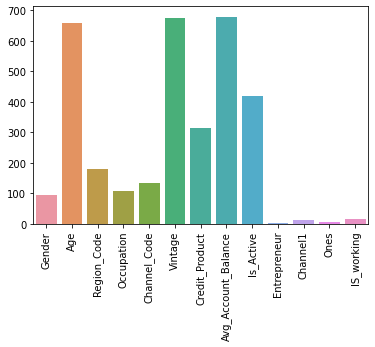

In [2146]:
lgb.fit(X_train[features_proc_2], y_train)
importance = lgb.feature_importances_
for i, j in zip(X_train[features_proc_2], importance):
    print(f'{i} : {j}')
    
sns.barplot(x = features_proc_2, y = importance)
plt.xticks(rotation = 90)

---

In [2291]:
lgb_oofs2, lgb_preds2 = cross_val(train_proc_2, test_proc_2, features_proc_2, LGBMClassifier(random_state = 42))


****************Fold 1****************

roc_auc_score is 0.8716117773198945

****************Fold 2****************

roc_auc_score is 0.8749580746060159

****************Fold 3****************

roc_auc_score is 0.8741972734870038

****************Fold 4****************

roc_auc_score is 0.8750675640318801

****************Fold 5****************

roc_auc_score is 0.873764332547583

roc_auc_score is 0.8738589036261137


In [2292]:
cat_oofs2, cat_preds2 = cross_val(train_proc_2, test_proc_2, features_proc_2, CatBoostClassifier(random_state = 42,cat_features = ['Region_Code', 'Occupation', 'Channel_Code', 'Gender','Credit_Product','Is_Active'] ))


****************Fold 1****************
Learning rate set to 0.098237
0:	learn: 0.6138572	total: 151ms	remaining: 2m 30s
1:	learn: 0.5524332	total: 282ms	remaining: 2m 20s
2:	learn: 0.5065260	total: 437ms	remaining: 2m 25s
3:	learn: 0.4730134	total: 585ms	remaining: 2m 25s
4:	learn: 0.4454219	total: 733ms	remaining: 2m 25s
5:	learn: 0.4247455	total: 881ms	remaining: 2m 25s
6:	learn: 0.4089302	total: 1.01s	remaining: 2m 24s
7:	learn: 0.3968970	total: 1.16s	remaining: 2m 24s
8:	learn: 0.3873883	total: 1.28s	remaining: 2m 21s
9:	learn: 0.3798332	total: 1.45s	remaining: 2m 23s
10:	learn: 0.3742062	total: 1.6s	remaining: 2m 23s
11:	learn: 0.3693156	total: 1.76s	remaining: 2m 25s
12:	learn: 0.3657429	total: 1.9s	remaining: 2m 24s
13:	learn: 0.3624618	total: 2.04s	remaining: 2m 23s
14:	learn: 0.3597101	total: 2.18s	remaining: 2m 23s
15:	learn: 0.3576285	total: 2.34s	remaining: 2m 23s
16:	learn: 0.3555247	total: 2.47s	remaining: 2m 22s
17:	learn: 0.3544480	total: 2.62s	remaining: 2m 22s
18:	le

158:	learn: 0.3412481	total: 24.1s	remaining: 2m 7s
159:	learn: 0.3412328	total: 24.2s	remaining: 2m 7s
160:	learn: 0.3411989	total: 24.4s	remaining: 2m 7s
161:	learn: 0.3411627	total: 24.6s	remaining: 2m 7s
162:	learn: 0.3411448	total: 24.8s	remaining: 2m 7s
163:	learn: 0.3411300	total: 24.9s	remaining: 2m 7s
164:	learn: 0.3411103	total: 25.1s	remaining: 2m 6s
165:	learn: 0.3410754	total: 25.2s	remaining: 2m 6s
166:	learn: 0.3410570	total: 25.3s	remaining: 2m 6s
167:	learn: 0.3410258	total: 25.5s	remaining: 2m 6s
168:	learn: 0.3410113	total: 25.6s	remaining: 2m 5s
169:	learn: 0.3409826	total: 25.8s	remaining: 2m 5s
170:	learn: 0.3409658	total: 25.9s	remaining: 2m 5s
171:	learn: 0.3409571	total: 26.1s	remaining: 2m 5s
172:	learn: 0.3409149	total: 26.3s	remaining: 2m 5s
173:	learn: 0.3408851	total: 26.4s	remaining: 2m 5s
174:	learn: 0.3408685	total: 26.6s	remaining: 2m 5s
175:	learn: 0.3408411	total: 26.7s	remaining: 2m 5s
176:	learn: 0.3408233	total: 26.9s	remaining: 2m 5s
177:	learn: 

315:	learn: 0.3384797	total: 50.3s	remaining: 1m 48s
316:	learn: 0.3384562	total: 50.5s	remaining: 1m 48s
317:	learn: 0.3384446	total: 50.7s	remaining: 1m 48s
318:	learn: 0.3384255	total: 50.9s	remaining: 1m 48s
319:	learn: 0.3384085	total: 51.1s	remaining: 1m 48s
320:	learn: 0.3384023	total: 51.2s	remaining: 1m 48s
321:	learn: 0.3383818	total: 51.4s	remaining: 1m 48s
322:	learn: 0.3383594	total: 51.6s	remaining: 1m 48s
323:	learn: 0.3383384	total: 51.8s	remaining: 1m 48s
324:	learn: 0.3383376	total: 51.9s	remaining: 1m 47s
325:	learn: 0.3383198	total: 52.1s	remaining: 1m 47s
326:	learn: 0.3383071	total: 52.3s	remaining: 1m 47s
327:	learn: 0.3382965	total: 52.5s	remaining: 1m 47s
328:	learn: 0.3382811	total: 52.6s	remaining: 1m 47s
329:	learn: 0.3382668	total: 52.8s	remaining: 1m 47s
330:	learn: 0.3382553	total: 52.9s	remaining: 1m 47s
331:	learn: 0.3382425	total: 53.1s	remaining: 1m 46s
332:	learn: 0.3382204	total: 53.3s	remaining: 1m 46s
333:	learn: 0.3382127	total: 53.5s	remaining: 

471:	learn: 0.3362496	total: 1m 17s	remaining: 1m 26s
472:	learn: 0.3362449	total: 1m 17s	remaining: 1m 26s
473:	learn: 0.3362385	total: 1m 17s	remaining: 1m 26s
474:	learn: 0.3362206	total: 1m 17s	remaining: 1m 25s
475:	learn: 0.3361956	total: 1m 17s	remaining: 1m 25s
476:	learn: 0.3361738	total: 1m 18s	remaining: 1m 25s
477:	learn: 0.3361563	total: 1m 18s	remaining: 1m 25s
478:	learn: 0.3361446	total: 1m 18s	remaining: 1m 25s
479:	learn: 0.3361291	total: 1m 18s	remaining: 1m 25s
480:	learn: 0.3361171	total: 1m 18s	remaining: 1m 25s
481:	learn: 0.3360997	total: 1m 19s	remaining: 1m 25s
482:	learn: 0.3360928	total: 1m 19s	remaining: 1m 24s
483:	learn: 0.3360856	total: 1m 19s	remaining: 1m 24s
484:	learn: 0.3360735	total: 1m 19s	remaining: 1m 24s
485:	learn: 0.3360615	total: 1m 20s	remaining: 1m 24s
486:	learn: 0.3360483	total: 1m 20s	remaining: 1m 24s
487:	learn: 0.3360299	total: 1m 20s	remaining: 1m 24s
488:	learn: 0.3360073	total: 1m 20s	remaining: 1m 24s
489:	learn: 0.3359949	total:

624:	learn: 0.3341998	total: 1m 47s	remaining: 1m 4s
625:	learn: 0.3341886	total: 1m 47s	remaining: 1m 4s
626:	learn: 0.3341744	total: 1m 47s	remaining: 1m 4s
627:	learn: 0.3341685	total: 1m 48s	remaining: 1m 4s
628:	learn: 0.3341599	total: 1m 48s	remaining: 1m 3s
629:	learn: 0.3341439	total: 1m 48s	remaining: 1m 3s
630:	learn: 0.3341151	total: 1m 48s	remaining: 1m 3s
631:	learn: 0.3341065	total: 1m 48s	remaining: 1m 3s
632:	learn: 0.3341034	total: 1m 49s	remaining: 1m 3s
633:	learn: 0.3340993	total: 1m 49s	remaining: 1m 3s
634:	learn: 0.3340949	total: 1m 49s	remaining: 1m 2s
635:	learn: 0.3340901	total: 1m 49s	remaining: 1m 2s
636:	learn: 0.3340862	total: 1m 49s	remaining: 1m 2s
637:	learn: 0.3340681	total: 1m 50s	remaining: 1m 2s
638:	learn: 0.3340613	total: 1m 50s	remaining: 1m 2s
639:	learn: 0.3340515	total: 1m 50s	remaining: 1m 2s
640:	learn: 0.3340509	total: 1m 50s	remaining: 1m 1s
641:	learn: 0.3340430	total: 1m 50s	remaining: 1m 1s
642:	learn: 0.3340154	total: 1m 51s	remaining:

781:	learn: 0.3323057	total: 2m 18s	remaining: 38.5s
782:	learn: 0.3322979	total: 2m 18s	remaining: 38.3s
783:	learn: 0.3322760	total: 2m 18s	remaining: 38.1s
784:	learn: 0.3322569	total: 2m 18s	remaining: 38s
785:	learn: 0.3322476	total: 2m 18s	remaining: 37.8s
786:	learn: 0.3322423	total: 2m 19s	remaining: 37.6s
787:	learn: 0.3322405	total: 2m 19s	remaining: 37.4s
788:	learn: 0.3322198	total: 2m 19s	remaining: 37.3s
789:	learn: 0.3321879	total: 2m 19s	remaining: 37.1s
790:	learn: 0.3321824	total: 2m 19s	remaining: 36.9s
791:	learn: 0.3321712	total: 2m 19s	remaining: 36.7s
792:	learn: 0.3321587	total: 2m 20s	remaining: 36.6s
793:	learn: 0.3321570	total: 2m 20s	remaining: 36.4s
794:	learn: 0.3321452	total: 2m 20s	remaining: 36.2s
795:	learn: 0.3321175	total: 2m 20s	remaining: 36s
796:	learn: 0.3321054	total: 2m 20s	remaining: 35.8s
797:	learn: 0.3320932	total: 2m 20s	remaining: 35.7s
798:	learn: 0.3320834	total: 2m 21s	remaining: 35.5s
799:	learn: 0.3320746	total: 2m 21s	remaining: 35.

938:	learn: 0.3305269	total: 2m 46s	remaining: 10.8s
939:	learn: 0.3305063	total: 2m 46s	remaining: 10.6s
940:	learn: 0.3304886	total: 2m 46s	remaining: 10.5s
941:	learn: 0.3304726	total: 2m 47s	remaining: 10.3s
942:	learn: 0.3304562	total: 2m 47s	remaining: 10.1s
943:	learn: 0.3304539	total: 2m 47s	remaining: 9.93s
944:	learn: 0.3304411	total: 2m 47s	remaining: 9.75s
945:	learn: 0.3304327	total: 2m 47s	remaining: 9.57s
946:	learn: 0.3304250	total: 2m 47s	remaining: 9.4s
947:	learn: 0.3304059	total: 2m 48s	remaining: 9.22s
948:	learn: 0.3304002	total: 2m 48s	remaining: 9.04s
949:	learn: 0.3303942	total: 2m 48s	remaining: 8.86s
950:	learn: 0.3303899	total: 2m 48s	remaining: 8.69s
951:	learn: 0.3303670	total: 2m 48s	remaining: 8.51s
952:	learn: 0.3303454	total: 2m 48s	remaining: 8.33s
953:	learn: 0.3303342	total: 2m 49s	remaining: 8.15s
954:	learn: 0.3303201	total: 2m 49s	remaining: 7.98s
955:	learn: 0.3303168	total: 2m 49s	remaining: 7.8s
956:	learn: 0.3302997	total: 2m 49s	remaining: 7

93:	learn: 0.3432921	total: 14.2s	remaining: 2m 16s
94:	learn: 0.3432647	total: 14.3s	remaining: 2m 16s
95:	learn: 0.3432371	total: 14.5s	remaining: 2m 16s
96:	learn: 0.3432139	total: 14.6s	remaining: 2m 16s
97:	learn: 0.3431700	total: 14.8s	remaining: 2m 16s
98:	learn: 0.3431283	total: 15s	remaining: 2m 16s
99:	learn: 0.3431279	total: 15.1s	remaining: 2m 15s
100:	learn: 0.3430461	total: 15.2s	remaining: 2m 15s
101:	learn: 0.3430036	total: 15.4s	remaining: 2m 15s
102:	learn: 0.3429731	total: 15.6s	remaining: 2m 15s
103:	learn: 0.3429448	total: 15.8s	remaining: 2m 16s
104:	learn: 0.3429017	total: 16s	remaining: 2m 16s
105:	learn: 0.3428633	total: 16.1s	remaining: 2m 16s
106:	learn: 0.3428354	total: 16.3s	remaining: 2m 16s
107:	learn: 0.3428049	total: 16.5s	remaining: 2m 16s
108:	learn: 0.3427838	total: 16.6s	remaining: 2m 15s
109:	learn: 0.3427602	total: 16.8s	remaining: 2m 15s
110:	learn: 0.3427535	total: 17s	remaining: 2m 15s
111:	learn: 0.3427317	total: 17.1s	remaining: 2m 15s
112:	l

252:	learn: 0.3397707	total: 40s	remaining: 1m 58s
253:	learn: 0.3397457	total: 40.2s	remaining: 1m 58s
254:	learn: 0.3397274	total: 40.4s	remaining: 1m 57s
255:	learn: 0.3397244	total: 40.5s	remaining: 1m 57s
256:	learn: 0.3396994	total: 40.7s	remaining: 1m 57s
257:	learn: 0.3396935	total: 40.8s	remaining: 1m 57s
258:	learn: 0.3396810	total: 41s	remaining: 1m 57s
259:	learn: 0.3396594	total: 41.1s	remaining: 1m 57s
260:	learn: 0.3396490	total: 41.3s	remaining: 1m 56s
261:	learn: 0.3396437	total: 41.5s	remaining: 1m 56s
262:	learn: 0.3396063	total: 41.6s	remaining: 1m 56s
263:	learn: 0.3395938	total: 41.8s	remaining: 1m 56s
264:	learn: 0.3395708	total: 42s	remaining: 1m 56s
265:	learn: 0.3395617	total: 42.2s	remaining: 1m 56s
266:	learn: 0.3395576	total: 42.3s	remaining: 1m 56s
267:	learn: 0.3395400	total: 42.5s	remaining: 1m 56s
268:	learn: 0.3395174	total: 42.7s	remaining: 1m 55s
269:	learn: 0.3395077	total: 42.8s	remaining: 1m 55s
270:	learn: 0.3394863	total: 43s	remaining: 1m 55s
2

409:	learn: 0.3375317	total: 1m 6s	remaining: 1m 36s
410:	learn: 0.3375188	total: 1m 7s	remaining: 1m 36s
411:	learn: 0.3375000	total: 1m 7s	remaining: 1m 36s
412:	learn: 0.3374939	total: 1m 7s	remaining: 1m 36s
413:	learn: 0.3374836	total: 1m 7s	remaining: 1m 35s
414:	learn: 0.3374713	total: 1m 7s	remaining: 1m 35s
415:	learn: 0.3374474	total: 1m 8s	remaining: 1m 35s
416:	learn: 0.3374425	total: 1m 8s	remaining: 1m 35s
417:	learn: 0.3374327	total: 1m 8s	remaining: 1m 35s
418:	learn: 0.3374281	total: 1m 8s	remaining: 1m 35s
419:	learn: 0.3374155	total: 1m 8s	remaining: 1m 35s
420:	learn: 0.3374000	total: 1m 9s	remaining: 1m 34s
421:	learn: 0.3373927	total: 1m 9s	remaining: 1m 34s
422:	learn: 0.3373907	total: 1m 9s	remaining: 1m 34s
423:	learn: 0.3373716	total: 1m 9s	remaining: 1m 34s
424:	learn: 0.3373564	total: 1m 9s	remaining: 1m 34s
425:	learn: 0.3373483	total: 1m 9s	remaining: 1m 34s
426:	learn: 0.3373441	total: 1m 9s	remaining: 1m 33s
427:	learn: 0.3373264	total: 1m 10s	remaining:

562:	learn: 0.3354596	total: 1m 34s	remaining: 1m 13s
563:	learn: 0.3354484	total: 1m 34s	remaining: 1m 12s
564:	learn: 0.3354448	total: 1m 34s	remaining: 1m 12s
565:	learn: 0.3354277	total: 1m 34s	remaining: 1m 12s
566:	learn: 0.3354123	total: 1m 34s	remaining: 1m 12s
567:	learn: 0.3354002	total: 1m 34s	remaining: 1m 12s
568:	learn: 0.3353793	total: 1m 35s	remaining: 1m 12s
569:	learn: 0.3353592	total: 1m 35s	remaining: 1m 11s
570:	learn: 0.3353398	total: 1m 35s	remaining: 1m 11s
571:	learn: 0.3353181	total: 1m 35s	remaining: 1m 11s
572:	learn: 0.3353062	total: 1m 35s	remaining: 1m 11s
573:	learn: 0.3352951	total: 1m 36s	remaining: 1m 11s
574:	learn: 0.3352677	total: 1m 36s	remaining: 1m 11s
575:	learn: 0.3352586	total: 1m 36s	remaining: 1m 10s
576:	learn: 0.3352575	total: 1m 36s	remaining: 1m 10s
577:	learn: 0.3352273	total: 1m 36s	remaining: 1m 10s
578:	learn: 0.3352265	total: 1m 36s	remaining: 1m 10s
579:	learn: 0.3352199	total: 1m 37s	remaining: 1m 10s
580:	learn: 0.3352065	total:

718:	learn: 0.3335723	total: 2m 2s	remaining: 48s
719:	learn: 0.3335589	total: 2m 3s	remaining: 47.8s
720:	learn: 0.3335551	total: 2m 3s	remaining: 47.7s
721:	learn: 0.3335396	total: 2m 3s	remaining: 47.5s
722:	learn: 0.3335178	total: 2m 3s	remaining: 47.4s
723:	learn: 0.3335003	total: 2m 3s	remaining: 47.2s
724:	learn: 0.3334850	total: 2m 3s	remaining: 47s
725:	learn: 0.3334641	total: 2m 4s	remaining: 46.8s
726:	learn: 0.3334583	total: 2m 4s	remaining: 46.7s
727:	learn: 0.3334462	total: 2m 4s	remaining: 46.5s
728:	learn: 0.3334283	total: 2m 4s	remaining: 46.4s
729:	learn: 0.3334112	total: 2m 4s	remaining: 46.2s
730:	learn: 0.3334034	total: 2m 5s	remaining: 46s
731:	learn: 0.3334023	total: 2m 5s	remaining: 45.8s
732:	learn: 0.3333741	total: 2m 5s	remaining: 45.7s
733:	learn: 0.3333705	total: 2m 5s	remaining: 45.5s
734:	learn: 0.3333506	total: 2m 5s	remaining: 45.3s
735:	learn: 0.3333436	total: 2m 5s	remaining: 45.2s
736:	learn: 0.3333338	total: 2m 6s	remaining: 45s
737:	learn: 0.333319

875:	learn: 0.3315809	total: 2m 32s	remaining: 21.6s
876:	learn: 0.3315682	total: 2m 32s	remaining: 21.4s
877:	learn: 0.3315475	total: 2m 32s	remaining: 21.2s
878:	learn: 0.3315414	total: 2m 32s	remaining: 21.1s
879:	learn: 0.3315385	total: 2m 33s	remaining: 20.9s
880:	learn: 0.3315194	total: 2m 33s	remaining: 20.7s
881:	learn: 0.3315168	total: 2m 33s	remaining: 20.5s
882:	learn: 0.3315096	total: 2m 33s	remaining: 20.4s
883:	learn: 0.3314918	total: 2m 33s	remaining: 20.2s
884:	learn: 0.3314869	total: 2m 34s	remaining: 20s
885:	learn: 0.3314771	total: 2m 34s	remaining: 19.9s
886:	learn: 0.3314698	total: 2m 34s	remaining: 19.7s
887:	learn: 0.3314687	total: 2m 34s	remaining: 19.5s
888:	learn: 0.3314665	total: 2m 34s	remaining: 19.3s
889:	learn: 0.3314497	total: 2m 34s	remaining: 19.2s
890:	learn: 0.3314462	total: 2m 35s	remaining: 19s
891:	learn: 0.3314263	total: 2m 35s	remaining: 18.8s
892:	learn: 0.3314058	total: 2m 35s	remaining: 18.6s
893:	learn: 0.3313944	total: 2m 35s	remaining: 18.

29:	learn: 0.3477545	total: 4.64s	remaining: 2m 30s
30:	learn: 0.3473579	total: 4.8s	remaining: 2m 30s
31:	learn: 0.3471920	total: 4.96s	remaining: 2m 29s
32:	learn: 0.3470204	total: 5.11s	remaining: 2m 29s
33:	learn: 0.3468759	total: 5.3s	remaining: 2m 30s
34:	learn: 0.3467406	total: 5.44s	remaining: 2m 29s
35:	learn: 0.3465837	total: 5.59s	remaining: 2m 29s
36:	learn: 0.3464880	total: 5.74s	remaining: 2m 29s
37:	learn: 0.3462390	total: 5.91s	remaining: 2m 29s
38:	learn: 0.3461085	total: 6.06s	remaining: 2m 29s
39:	learn: 0.3459388	total: 6.25s	remaining: 2m 30s
40:	learn: 0.3458413	total: 6.43s	remaining: 2m 30s
41:	learn: 0.3455996	total: 6.62s	remaining: 2m 31s
42:	learn: 0.3455526	total: 6.8s	remaining: 2m 31s
43:	learn: 0.3454847	total: 6.94s	remaining: 2m 30s
44:	learn: 0.3454141	total: 7.1s	remaining: 2m 30s
45:	learn: 0.3453473	total: 7.29s	remaining: 2m 31s
46:	learn: 0.3452873	total: 7.46s	remaining: 2m 31s
47:	learn: 0.3452110	total: 7.65s	remaining: 2m 31s
48:	learn: 0.345

186:	learn: 0.3412965	total: 30.8s	remaining: 2m 13s
187:	learn: 0.3412557	total: 31s	remaining: 2m 13s
188:	learn: 0.3412373	total: 31.1s	remaining: 2m 13s
189:	learn: 0.3412337	total: 31.2s	remaining: 2m 13s
190:	learn: 0.3412009	total: 31.4s	remaining: 2m 13s
191:	learn: 0.3411613	total: 31.6s	remaining: 2m 13s
192:	learn: 0.3411583	total: 31.8s	remaining: 2m 13s
193:	learn: 0.3411278	total: 32s	remaining: 2m 12s
194:	learn: 0.3411102	total: 32.1s	remaining: 2m 12s
195:	learn: 0.3410947	total: 32.3s	remaining: 2m 12s
196:	learn: 0.3410641	total: 32.4s	remaining: 2m 12s
197:	learn: 0.3410543	total: 32.6s	remaining: 2m 11s
198:	learn: 0.3410366	total: 32.8s	remaining: 2m 11s
199:	learn: 0.3410236	total: 32.9s	remaining: 2m 11s
200:	learn: 0.3409999	total: 33.1s	remaining: 2m 11s
201:	learn: 0.3409988	total: 33.2s	remaining: 2m 11s
202:	learn: 0.3409795	total: 33.4s	remaining: 2m 11s
203:	learn: 0.3409670	total: 33.6s	remaining: 2m 11s
204:	learn: 0.3409597	total: 33.8s	remaining: 2m 1

343:	learn: 0.3387040	total: 57.5s	remaining: 1m 49s
344:	learn: 0.3386887	total: 57.7s	remaining: 1m 49s
345:	learn: 0.3386724	total: 57.9s	remaining: 1m 49s
346:	learn: 0.3386620	total: 58.1s	remaining: 1m 49s
347:	learn: 0.3386366	total: 58.3s	remaining: 1m 49s
348:	learn: 0.3386222	total: 58.4s	remaining: 1m 49s
349:	learn: 0.3385909	total: 58.6s	remaining: 1m 48s
350:	learn: 0.3385886	total: 58.8s	remaining: 1m 48s
351:	learn: 0.3385647	total: 59s	remaining: 1m 48s
352:	learn: 0.3385621	total: 59.2s	remaining: 1m 48s
353:	learn: 0.3385558	total: 59.4s	remaining: 1m 48s
354:	learn: 0.3385376	total: 59.5s	remaining: 1m 48s
355:	learn: 0.3385350	total: 59.7s	remaining: 1m 47s
356:	learn: 0.3385314	total: 59.8s	remaining: 1m 47s
357:	learn: 0.3385269	total: 60s	remaining: 1m 47s
358:	learn: 0.3385149	total: 1m	remaining: 1m 47s
359:	learn: 0.3385132	total: 1m	remaining: 1m 47s
360:	learn: 0.3385062	total: 1m	remaining: 1m 46s
361:	learn: 0.3384883	total: 1m	remaining: 1m 46s
362:	lear

498:	learn: 0.3366826	total: 1m 25s	remaining: 1m 25s
499:	learn: 0.3366684	total: 1m 25s	remaining: 1m 25s
500:	learn: 0.3366532	total: 1m 25s	remaining: 1m 25s
501:	learn: 0.3366375	total: 1m 26s	remaining: 1m 25s
502:	learn: 0.3366257	total: 1m 26s	remaining: 1m 25s
503:	learn: 0.3366253	total: 1m 26s	remaining: 1m 24s
504:	learn: 0.3366140	total: 1m 26s	remaining: 1m 24s
505:	learn: 0.3366035	total: 1m 26s	remaining: 1m 24s
506:	learn: 0.3366013	total: 1m 26s	remaining: 1m 24s
507:	learn: 0.3365708	total: 1m 26s	remaining: 1m 24s
508:	learn: 0.3365669	total: 1m 27s	remaining: 1m 24s
509:	learn: 0.3365596	total: 1m 27s	remaining: 1m 23s
510:	learn: 0.3365499	total: 1m 27s	remaining: 1m 23s
511:	learn: 0.3365269	total: 1m 27s	remaining: 1m 23s
512:	learn: 0.3365208	total: 1m 27s	remaining: 1m 23s
513:	learn: 0.3365040	total: 1m 28s	remaining: 1m 23s
514:	learn: 0.3364988	total: 1m 28s	remaining: 1m 23s
515:	learn: 0.3364837	total: 1m 28s	remaining: 1m 22s
516:	learn: 0.3364621	total:

651:	learn: 0.3346893	total: 1m 53s	remaining: 1m
652:	learn: 0.3346797	total: 1m 53s	remaining: 1m
653:	learn: 0.3346706	total: 1m 53s	remaining: 1m
654:	learn: 0.3346442	total: 1m 53s	remaining: 60s
655:	learn: 0.3346394	total: 1m 54s	remaining: 59.8s
656:	learn: 0.3346205	total: 1m 54s	remaining: 59.6s
657:	learn: 0.3346084	total: 1m 54s	remaining: 59.5s
658:	learn: 0.3345870	total: 1m 54s	remaining: 59.3s
659:	learn: 0.3345826	total: 1m 54s	remaining: 59.1s
660:	learn: 0.3345646	total: 1m 54s	remaining: 58.9s
661:	learn: 0.3345402	total: 1m 55s	remaining: 58.8s
662:	learn: 0.3345203	total: 1m 55s	remaining: 58.6s
663:	learn: 0.3344939	total: 1m 55s	remaining: 58.4s
664:	learn: 0.3344775	total: 1m 55s	remaining: 58.2s
665:	learn: 0.3344747	total: 1m 55s	remaining: 58.1s
666:	learn: 0.3344636	total: 1m 55s	remaining: 57.9s
667:	learn: 0.3344432	total: 1m 56s	remaining: 57.7s
668:	learn: 0.3344329	total: 1m 56s	remaining: 57.5s
669:	learn: 0.3344198	total: 1m 56s	remaining: 57.3s
670:

809:	learn: 0.3326951	total: 2m 22s	remaining: 33.3s
810:	learn: 0.3326797	total: 2m 22s	remaining: 33.2s
811:	learn: 0.3326762	total: 2m 22s	remaining: 33s
812:	learn: 0.3326616	total: 2m 22s	remaining: 32.8s
813:	learn: 0.3326501	total: 2m 22s	remaining: 32.7s
814:	learn: 0.3326243	total: 2m 23s	remaining: 32.5s
815:	learn: 0.3326096	total: 2m 23s	remaining: 32.3s
816:	learn: 0.3326015	total: 2m 23s	remaining: 32.1s
817:	learn: 0.3326015	total: 2m 23s	remaining: 32s
818:	learn: 0.3325994	total: 2m 23s	remaining: 31.8s
819:	learn: 0.3325855	total: 2m 24s	remaining: 31.6s
820:	learn: 0.3325741	total: 2m 24s	remaining: 31.4s
821:	learn: 0.3325734	total: 2m 24s	remaining: 31.3s
822:	learn: 0.3325557	total: 2m 24s	remaining: 31.1s
823:	learn: 0.3325454	total: 2m 24s	remaining: 30.9s
824:	learn: 0.3325223	total: 2m 24s	remaining: 30.7s
825:	learn: 0.3325137	total: 2m 25s	remaining: 30.6s
826:	learn: 0.3325050	total: 2m 25s	remaining: 30.4s
827:	learn: 0.3324872	total: 2m 25s	remaining: 30.

966:	learn: 0.3309668	total: 2m 52s	remaining: 5.88s
967:	learn: 0.3309495	total: 2m 52s	remaining: 5.7s
968:	learn: 0.3309276	total: 2m 52s	remaining: 5.53s
969:	learn: 0.3309197	total: 2m 52s	remaining: 5.35s
970:	learn: 0.3309086	total: 2m 53s	remaining: 5.17s
971:	learn: 0.3308991	total: 2m 53s	remaining: 4.99s
972:	learn: 0.3308969	total: 2m 53s	remaining: 4.81s
973:	learn: 0.3308822	total: 2m 53s	remaining: 4.63s
974:	learn: 0.3308627	total: 2m 53s	remaining: 4.46s
975:	learn: 0.3308521	total: 2m 54s	remaining: 4.28s
976:	learn: 0.3308422	total: 2m 54s	remaining: 4.1s
977:	learn: 0.3308340	total: 2m 54s	remaining: 3.93s
978:	learn: 0.3308243	total: 2m 54s	remaining: 3.75s
979:	learn: 0.3308169	total: 2m 55s	remaining: 3.57s
980:	learn: 0.3308028	total: 2m 55s	remaining: 3.39s
981:	learn: 0.3307973	total: 2m 55s	remaining: 3.21s
982:	learn: 0.3307921	total: 2m 55s	remaining: 3.04s
983:	learn: 0.3307852	total: 2m 55s	remaining: 2.86s
984:	learn: 0.3307770	total: 2m 55s	remaining: 2

122:	learn: 0.3422498	total: 19.6s	remaining: 2m 19s
123:	learn: 0.3422283	total: 19.8s	remaining: 2m 19s
124:	learn: 0.3421900	total: 19.9s	remaining: 2m 19s
125:	learn: 0.3421776	total: 20.1s	remaining: 2m 19s
126:	learn: 0.3421525	total: 20.2s	remaining: 2m 19s
127:	learn: 0.3421404	total: 20.4s	remaining: 2m 18s
128:	learn: 0.3421087	total: 20.6s	remaining: 2m 18s
129:	learn: 0.3420886	total: 20.8s	remaining: 2m 19s
130:	learn: 0.3420810	total: 20.9s	remaining: 2m 18s
131:	learn: 0.3420560	total: 21.1s	remaining: 2m 18s
132:	learn: 0.3420453	total: 21.3s	remaining: 2m 18s
133:	learn: 0.3420022	total: 21.4s	remaining: 2m 18s
134:	learn: 0.3419935	total: 21.7s	remaining: 2m 18s
135:	learn: 0.3419822	total: 21.8s	remaining: 2m 18s
136:	learn: 0.3419483	total: 22s	remaining: 2m 18s
137:	learn: 0.3419227	total: 22.2s	remaining: 2m 18s
138:	learn: 0.3419060	total: 22.3s	remaining: 2m 18s
139:	learn: 0.3418542	total: 22.5s	remaining: 2m 18s
140:	learn: 0.3418232	total: 22.7s	remaining: 2m

280:	learn: 0.3390651	total: 48.1s	remaining: 2m 3s
281:	learn: 0.3390555	total: 48.4s	remaining: 2m 3s
282:	learn: 0.3390250	total: 48.6s	remaining: 2m 3s
283:	learn: 0.3390048	total: 48.8s	remaining: 2m 3s
284:	learn: 0.3389848	total: 49s	remaining: 2m 2s
285:	learn: 0.3389620	total: 49.2s	remaining: 2m 2s
286:	learn: 0.3389425	total: 49.4s	remaining: 2m 2s
287:	learn: 0.3389374	total: 49.5s	remaining: 2m 2s
288:	learn: 0.3389302	total: 49.7s	remaining: 2m 2s
289:	learn: 0.3389185	total: 49.9s	remaining: 2m 2s
290:	learn: 0.3388979	total: 50.1s	remaining: 2m 1s
291:	learn: 0.3388675	total: 50.3s	remaining: 2m 1s
292:	learn: 0.3388566	total: 50.4s	remaining: 2m 1s
293:	learn: 0.3388310	total: 50.7s	remaining: 2m 1s
294:	learn: 0.3388112	total: 50.8s	remaining: 2m 1s
295:	learn: 0.3387941	total: 51s	remaining: 2m 1s
296:	learn: 0.3387870	total: 51.2s	remaining: 2m 1s
297:	learn: 0.3387659	total: 51.4s	remaining: 2m
298:	learn: 0.3387542	total: 51.6s	remaining: 2m
299:	learn: 0.3387373	

437:	learn: 0.3368158	total: 1m 17s	remaining: 1m 39s
438:	learn: 0.3368089	total: 1m 17s	remaining: 1m 39s
439:	learn: 0.3368049	total: 1m 17s	remaining: 1m 39s
440:	learn: 0.3367836	total: 1m 18s	remaining: 1m 39s
441:	learn: 0.3367778	total: 1m 18s	remaining: 1m 38s
442:	learn: 0.3367623	total: 1m 18s	remaining: 1m 38s
443:	learn: 0.3367508	total: 1m 18s	remaining: 1m 38s
444:	learn: 0.3367341	total: 1m 18s	remaining: 1m 38s
445:	learn: 0.3367146	total: 1m 19s	remaining: 1m 38s
446:	learn: 0.3367024	total: 1m 19s	remaining: 1m 38s
447:	learn: 0.3366962	total: 1m 19s	remaining: 1m 37s
448:	learn: 0.3366798	total: 1m 19s	remaining: 1m 37s
449:	learn: 0.3366643	total: 1m 19s	remaining: 1m 37s
450:	learn: 0.3366323	total: 1m 20s	remaining: 1m 37s
451:	learn: 0.3366257	total: 1m 20s	remaining: 1m 37s
452:	learn: 0.3366196	total: 1m 20s	remaining: 1m 37s
453:	learn: 0.3365984	total: 1m 20s	remaining: 1m 36s
454:	learn: 0.3365777	total: 1m 20s	remaining: 1m 36s
455:	learn: 0.3365671	total:

590:	learn: 0.3348442	total: 1m 45s	remaining: 1m 12s
591:	learn: 0.3348283	total: 1m 45s	remaining: 1m 12s
592:	learn: 0.3348215	total: 1m 45s	remaining: 1m 12s
593:	learn: 0.3348163	total: 1m 46s	remaining: 1m 12s
594:	learn: 0.3348113	total: 1m 46s	remaining: 1m 12s
595:	learn: 0.3348024	total: 1m 46s	remaining: 1m 12s
596:	learn: 0.3347901	total: 1m 46s	remaining: 1m 11s
597:	learn: 0.3347699	total: 1m 46s	remaining: 1m 11s
598:	learn: 0.3347628	total: 1m 46s	remaining: 1m 11s
599:	learn: 0.3347533	total: 1m 47s	remaining: 1m 11s
600:	learn: 0.3347471	total: 1m 47s	remaining: 1m 11s
601:	learn: 0.3347451	total: 1m 47s	remaining: 1m 11s
602:	learn: 0.3347426	total: 1m 47s	remaining: 1m 10s
603:	learn: 0.3347328	total: 1m 47s	remaining: 1m 10s
604:	learn: 0.3347264	total: 1m 47s	remaining: 1m 10s
605:	learn: 0.3346984	total: 1m 48s	remaining: 1m 10s
606:	learn: 0.3346821	total: 1m 48s	remaining: 1m 10s
607:	learn: 0.3346737	total: 1m 48s	remaining: 1m 9s
608:	learn: 0.3346655	total: 

747:	learn: 0.3330946	total: 2m 13s	remaining: 45s
748:	learn: 0.3330888	total: 2m 13s	remaining: 44.9s
749:	learn: 0.3330742	total: 2m 14s	remaining: 44.7s
750:	learn: 0.3330639	total: 2m 14s	remaining: 44.5s
751:	learn: 0.3330544	total: 2m 14s	remaining: 44.3s
752:	learn: 0.3330499	total: 2m 14s	remaining: 44.2s
753:	learn: 0.3330451	total: 2m 14s	remaining: 44s
754:	learn: 0.3330334	total: 2m 14s	remaining: 43.8s
755:	learn: 0.3330302	total: 2m 15s	remaining: 43.6s
756:	learn: 0.3330199	total: 2m 15s	remaining: 43.4s
757:	learn: 0.3330120	total: 2m 15s	remaining: 43.3s
758:	learn: 0.3330101	total: 2m 15s	remaining: 43.1s
759:	learn: 0.3329994	total: 2m 15s	remaining: 42.9s
760:	learn: 0.3329884	total: 2m 16s	remaining: 42.7s
761:	learn: 0.3329833	total: 2m 16s	remaining: 42.6s
762:	learn: 0.3329774	total: 2m 16s	remaining: 42.4s
763:	learn: 0.3329715	total: 2m 16s	remaining: 42.2s
764:	learn: 0.3329705	total: 2m 16s	remaining: 42s
765:	learn: 0.3329632	total: 2m 16s	remaining: 41.8s

903:	learn: 0.3314526	total: 2m 42s	remaining: 17.2s
904:	learn: 0.3314424	total: 2m 42s	remaining: 17s
905:	learn: 0.3314390	total: 2m 42s	remaining: 16.9s
906:	learn: 0.3314366	total: 2m 42s	remaining: 16.7s
907:	learn: 0.3314322	total: 2m 42s	remaining: 16.5s
908:	learn: 0.3314223	total: 2m 43s	remaining: 16.3s
909:	learn: 0.3314160	total: 2m 43s	remaining: 16.1s
910:	learn: 0.3314047	total: 2m 43s	remaining: 16s
911:	learn: 0.3313830	total: 2m 43s	remaining: 15.8s
912:	learn: 0.3313723	total: 2m 43s	remaining: 15.6s
913:	learn: 0.3313613	total: 2m 43s	remaining: 15.4s
914:	learn: 0.3313457	total: 2m 44s	remaining: 15.3s
915:	learn: 0.3313336	total: 2m 44s	remaining: 15.1s
916:	learn: 0.3313289	total: 2m 44s	remaining: 14.9s
917:	learn: 0.3313125	total: 2m 44s	remaining: 14.7s
918:	learn: 0.3312978	total: 2m 44s	remaining: 14.5s
919:	learn: 0.3312770	total: 2m 45s	remaining: 14.3s
920:	learn: 0.3312695	total: 2m 45s	remaining: 14.2s
921:	learn: 0.3312581	total: 2m 45s	remaining: 14s

59:	learn: 0.3438605	total: 9.31s	remaining: 2m 25s
60:	learn: 0.3438303	total: 9.47s	remaining: 2m 25s
61:	learn: 0.3438282	total: 9.54s	remaining: 2m 24s
62:	learn: 0.3437891	total: 9.7s	remaining: 2m 24s
63:	learn: 0.3437409	total: 9.85s	remaining: 2m 24s
64:	learn: 0.3437376	total: 9.96s	remaining: 2m 23s
65:	learn: 0.3436891	total: 10.1s	remaining: 2m 23s
66:	learn: 0.3436275	total: 10.3s	remaining: 2m 23s
67:	learn: 0.3434766	total: 10.4s	remaining: 2m 23s
68:	learn: 0.3434307	total: 10.6s	remaining: 2m 23s
69:	learn: 0.3433403	total: 10.8s	remaining: 2m 23s
70:	learn: 0.3432941	total: 11s	remaining: 2m 23s
71:	learn: 0.3432733	total: 11.1s	remaining: 2m 23s
72:	learn: 0.3432529	total: 11.3s	remaining: 2m 22s
73:	learn: 0.3432096	total: 11.4s	remaining: 2m 22s
74:	learn: 0.3431894	total: 11.6s	remaining: 2m 22s
75:	learn: 0.3431706	total: 11.7s	remaining: 2m 22s
76:	learn: 0.3431522	total: 11.9s	remaining: 2m 22s
77:	learn: 0.3431046	total: 12s	remaining: 2m 22s
78:	learn: 0.3430

216:	learn: 0.3398621	total: 34.3s	remaining: 2m 3s
217:	learn: 0.3398567	total: 34.4s	remaining: 2m 3s
218:	learn: 0.3398402	total: 34.6s	remaining: 2m 3s
219:	learn: 0.3398346	total: 34.7s	remaining: 2m 3s
220:	learn: 0.3398228	total: 34.9s	remaining: 2m 3s
221:	learn: 0.3398058	total: 35.1s	remaining: 2m 3s
222:	learn: 0.3397902	total: 35.3s	remaining: 2m 2s
223:	learn: 0.3397777	total: 35.4s	remaining: 2m 2s
224:	learn: 0.3397525	total: 35.6s	remaining: 2m 2s
225:	learn: 0.3397403	total: 35.8s	remaining: 2m 2s
226:	learn: 0.3397351	total: 35.9s	remaining: 2m 2s
227:	learn: 0.3397266	total: 36s	remaining: 2m 2s
228:	learn: 0.3397091	total: 36.2s	remaining: 2m 1s
229:	learn: 0.3397023	total: 36.3s	remaining: 2m 1s
230:	learn: 0.3396803	total: 36.5s	remaining: 2m 1s
231:	learn: 0.3396565	total: 36.7s	remaining: 2m 1s
232:	learn: 0.3396402	total: 36.9s	remaining: 2m 1s
233:	learn: 0.3396355	total: 37.1s	remaining: 2m 1s
234:	learn: 0.3396244	total: 37.2s	remaining: 2m 1s
235:	learn: 0.

373:	learn: 0.3375920	total: 1m 1s	remaining: 1m 42s
374:	learn: 0.3375785	total: 1m 1s	remaining: 1m 42s
375:	learn: 0.3375764	total: 1m 1s	remaining: 1m 41s
376:	learn: 0.3375678	total: 1m 1s	remaining: 1m 41s
377:	learn: 0.3375421	total: 1m 1s	remaining: 1m 41s
378:	learn: 0.3375272	total: 1m 1s	remaining: 1m 41s
379:	learn: 0.3375163	total: 1m 2s	remaining: 1m 41s
380:	learn: 0.3375091	total: 1m 2s	remaining: 1m 41s
381:	learn: 0.3374999	total: 1m 2s	remaining: 1m 40s
382:	learn: 0.3374891	total: 1m 2s	remaining: 1m 40s
383:	learn: 0.3374777	total: 1m 2s	remaining: 1m 40s
384:	learn: 0.3374727	total: 1m 2s	remaining: 1m 40s
385:	learn: 0.3374562	total: 1m 3s	remaining: 1m 40s
386:	learn: 0.3374282	total: 1m 3s	remaining: 1m 40s
387:	learn: 0.3374050	total: 1m 3s	remaining: 1m 39s
388:	learn: 0.3373947	total: 1m 3s	remaining: 1m 39s
389:	learn: 0.3373838	total: 1m 3s	remaining: 1m 39s
390:	learn: 0.3373702	total: 1m 3s	remaining: 1m 39s
391:	learn: 0.3373576	total: 1m 4s	remaining: 

526:	learn: 0.3355351	total: 1m 27s	remaining: 1m 18s
527:	learn: 0.3355320	total: 1m 27s	remaining: 1m 18s
528:	learn: 0.3355027	total: 1m 27s	remaining: 1m 18s
529:	learn: 0.3354933	total: 1m 27s	remaining: 1m 17s
530:	learn: 0.3354818	total: 1m 28s	remaining: 1m 17s
531:	learn: 0.3354602	total: 1m 28s	remaining: 1m 17s
532:	learn: 0.3354506	total: 1m 28s	remaining: 1m 17s
533:	learn: 0.3354386	total: 1m 28s	remaining: 1m 17s
534:	learn: 0.3354301	total: 1m 28s	remaining: 1m 17s
535:	learn: 0.3354280	total: 1m 29s	remaining: 1m 17s
536:	learn: 0.3354261	total: 1m 29s	remaining: 1m 16s
537:	learn: 0.3354159	total: 1m 29s	remaining: 1m 16s
538:	learn: 0.3353870	total: 1m 29s	remaining: 1m 16s
539:	learn: 0.3353839	total: 1m 29s	remaining: 1m 16s
540:	learn: 0.3353753	total: 1m 29s	remaining: 1m 16s
541:	learn: 0.3353584	total: 1m 30s	remaining: 1m 16s
542:	learn: 0.3353479	total: 1m 30s	remaining: 1m 15s
543:	learn: 0.3353304	total: 1m 30s	remaining: 1m 15s
544:	learn: 0.3353161	total:

682:	learn: 0.3334370	total: 1m 55s	remaining: 53.8s
683:	learn: 0.3334166	total: 1m 55s	remaining: 53.6s
684:	learn: 0.3334045	total: 1m 56s	remaining: 53.4s
685:	learn: 0.3333832	total: 1m 56s	remaining: 53.3s
686:	learn: 0.3333732	total: 1m 56s	remaining: 53.1s
687:	learn: 0.3333633	total: 1m 56s	remaining: 53s
688:	learn: 0.3333599	total: 1m 56s	remaining: 52.8s
689:	learn: 0.3333385	total: 1m 57s	remaining: 52.6s
690:	learn: 0.3333233	total: 1m 57s	remaining: 52.5s
691:	learn: 0.3333091	total: 1m 57s	remaining: 52.3s
692:	learn: 0.3333046	total: 1m 57s	remaining: 52.1s
693:	learn: 0.3332853	total: 1m 57s	remaining: 52s
694:	learn: 0.3332677	total: 1m 58s	remaining: 51.8s
695:	learn: 0.3332602	total: 1m 58s	remaining: 51.6s
696:	learn: 0.3332444	total: 1m 58s	remaining: 51.5s
697:	learn: 0.3332206	total: 1m 58s	remaining: 51.3s
698:	learn: 0.3332104	total: 1m 58s	remaining: 51.1s
699:	learn: 0.3332047	total: 1m 58s	remaining: 51s
700:	learn: 0.3331838	total: 1m 59s	remaining: 50.8s

839:	learn: 0.3315406	total: 2m 24s	remaining: 27.5s
840:	learn: 0.3315218	total: 2m 24s	remaining: 27.4s
841:	learn: 0.3315112	total: 2m 24s	remaining: 27.2s
842:	learn: 0.3315089	total: 2m 24s	remaining: 27s
843:	learn: 0.3315043	total: 2m 25s	remaining: 26.8s
844:	learn: 0.3314969	total: 2m 25s	remaining: 26.7s
845:	learn: 0.3314930	total: 2m 25s	remaining: 26.5s
846:	learn: 0.3314798	total: 2m 25s	remaining: 26.3s
847:	learn: 0.3314597	total: 2m 25s	remaining: 26.1s
848:	learn: 0.3314527	total: 2m 26s	remaining: 26s
849:	learn: 0.3314378	total: 2m 26s	remaining: 25.8s
850:	learn: 0.3314201	total: 2m 26s	remaining: 25.6s
851:	learn: 0.3314149	total: 2m 26s	remaining: 25.5s
852:	learn: 0.3314077	total: 2m 26s	remaining: 25.3s
853:	learn: 0.3313908	total: 2m 26s	remaining: 25.1s
854:	learn: 0.3313879	total: 2m 27s	remaining: 24.9s
855:	learn: 0.3313816	total: 2m 27s	remaining: 24.8s
856:	learn: 0.3313673	total: 2m 27s	remaining: 24.6s
857:	learn: 0.3313517	total: 2m 27s	remaining: 24.

995:	learn: 0.3298039	total: 2m 53s	remaining: 695ms
996:	learn: 0.3297837	total: 2m 53s	remaining: 522ms
997:	learn: 0.3297647	total: 2m 53s	remaining: 348ms
998:	learn: 0.3297618	total: 2m 53s	remaining: 174ms
999:	learn: 0.3297561	total: 2m 53s	remaining: 0us

roc_auc_score is 0.8737738647066977

roc_auc_score is 0.8738060988492133


In [2293]:
xgb_oofs2, xgb_preds2 = cross_val(train_proc_2, test_proc_2, features_proc_2, XGBClassifier(random_state = 42))


****************Fold 1****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8703323093865577

****************Fold 2****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8731879279542512

****************Fold 3****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8713872454976748

****************Fold 4****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8733387367733058

****************Fold 5****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.871645057389659

roc_auc_score is 0.8719481843529584


In [2294]:
rf_oofs2, rf_preds2 = cross_val(train_proc_2, test_proc_2, features_proc_2, RandomForestClassifier(random_state = 42))


****************Fold 1****************

roc_auc_score is 0.8541602575048318

****************Fold 2****************

roc_auc_score is 0.8544253857378514

****************Fold 3****************

roc_auc_score is 0.8542113153720164

****************Fold 4****************

roc_auc_score is 0.8563355542862248

****************Fold 5****************

roc_auc_score is 0.8532786636084466

roc_auc_score is 0.8544820613665254


In [2296]:
ad_oofs2, ad_preds2 = cross_val(train_proc_2, test_proc_2, features_proc_2, AdaBoostClassifier(random_state = 42))


****************Fold 1****************

roc_auc_score is 0.8640493400087786

****************Fold 2****************

roc_auc_score is 0.8664504618061588

****************Fold 3****************

roc_auc_score is 0.8657928583225623

****************Fold 4****************

roc_auc_score is 0.866325449405092

****************Fold 5****************

roc_auc_score is 0.8650025903227828

roc_auc_score is 0.8654903628184537


---

# Hyperparameter Optimization

In [2237]:
X = train_proc_2.drop(target, axis = 1)
y = train_proc_2[target]

In [2238]:
X_trn,X_val,y_trn,y_val = train_test_split(X[features_proc_2], y, stratify = y)

### XGB

In [2044]:
# %%time
# def create_model_1(trial):
#     max_depth = trial.suggest_int('max_depth',2,30)
#     n_estimators = trial.suggest_int('n_estimators',1,2000)
#     learning_rate = trial.suggest_uniform('learning_rate',0.1,1)
#     colsample_bytree = trial.suggest_uniform('colsample_bytree',0.1,0.9)
#     #reg_alpha = trial.suggest_int('reg_alpha',1,10)
#     #reg_lambda = trial.suggest_int('reg_lambda',1,10)
    
#     model = XGBClassifier(learning_rate=learning_rate,
#                         n_estimators = n_estimators,
#                         max_depth = max_depth,
#                         colsample_bytree = colsample_bytree,
#                         random_state = 0,
#                         n_jobs = -1)
#     return model

# sampler = TPESampler(seed = 0)

# def objective(trial):
#     model = create_model_1(trial)
#     model.fit(X_trn,y_trn)
#     preds = model.predict_proba(X_val)[:,1]
#     score = roc_auc_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = 'maximize', sampler = sampler)
# study.optimize(objective, n_trials = 30)

# xgb_params = study.best_params
# xgb_params['random_state'] = 0
# xgb = XGBClassifier(**xgb_params)
# xgb.fit(X_trn, y_trn)
# preds = xgb.predict_proba(X_val)[:,1]
# print('Optimized XGB roc_auc_score', roc_auc_score(y_val,preds))

# # parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.7352822877512424, 'colsample_bytree': 0.4053387138789165}.

[I 2021-05-30 07:59:40,461] A new study created in memory with name: no-name-54c1135e-75f1-466c-a9d6-05df35aa68ad


[07:59:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:04:32,588] Trial 0 finished with value: 0.8152270243542623 and parameters: {'max_depth': 17, 'n_estimators': 1431, 'learning_rate': 0.6424870384644795, 'colsample_bytree': 0.5359065463975176}. Best is trial 0 with value: 0.8152270243542623.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:04:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:09:44,709] Trial 1 finished with value: 0.8231181709870097 and parameters: {'max_depth': 14, 'n_estimators': 1292, 'learning_rate': 0.49382849013642327, 'colsample_bytree': 0.8134184006256638}. Best is trial 1 with value: 0.8231181709870097.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:09:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:13:55,768] Trial 2 finished with value: 0.8225701379899524 and parameters: {'max_depth': 29, 'n_estimators': 767, 'learning_rate': 0.8125525342743981, 'colsample_bytree': 0.5231159358023236}. Best is trial 1 with value: 0.8231181709870097.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:13:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:16:36,640] Trial 3 finished with value: 0.8512567857380937 and parameters: {'max_depth': 18, 'n_estimators': 1852, 'learning_rate': 0.16393245237809825, 'colsample_bytree': 0.1697034397612326}. Best is trial 3 with value: 0.8512567857380937.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:16:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:17:39,846] Trial 4 finished with value: 0.8653202521009487 and parameters: {'max_depth': 2, 'n_estimators': 1666, 'learning_rate': 0.8003410758548655, 'colsample_bytree': 0.7960097185974554}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:17:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:29:30,190] Trial 5 finished with value: 0.8261286144277304 and parameters: {'max_depth': 30, 'n_estimators': 1599, 'learning_rate': 0.5153314260276387, 'colsample_bytree': 0.7244233410291644}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:29:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:31:25,081] Trial 6 finished with value: 0.8633885573734038 and parameters: {'max_depth': 5, 'n_estimators': 1280, 'learning_rate': 0.22901795866814179, 'colsample_bytree': 0.8557351336396671}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:31:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:35:20,096] Trial 7 finished with value: 0.8281008513629292 and parameters: {'max_depth': 17, 'n_estimators': 830, 'learning_rate': 0.3381000508941643, 'colsample_bytree': 0.7193869515473733}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:35:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:39:24,000] Trial 8 finished with value: 0.839208503167166 and parameters: {'max_depth': 15, 'n_estimators': 1137, 'learning_rate': 0.11691082039271963, 'colsample_bytree': 0.5941083976607017}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:39:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:44:56,681] Trial 9 finished with value: 0.8172847149316347 and parameters: {'max_depth': 19, 'n_estimators': 1234, 'learning_rate': 0.9493732706631618, 'colsample_bytree': 0.6454562392827867}. Best is trial 4 with value: 0.8653202521009487.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:44:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:45:03,089] Trial 10 finished with value: 0.8676775821625533 and parameters: {'max_depth': 2, 'n_estimators': 278, 'learning_rate': 0.957500434774104, 'colsample_bytree': 0.2854632714994162}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:45:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:45:05,900] Trial 11 finished with value: 0.8670941494214375 and parameters: {'max_depth': 2, 'n_estimators': 115, 'learning_rate': 0.9842086892687376, 'colsample_bytree': 0.2716501691470278}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:45:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:45:10,465] Trial 12 finished with value: 0.8637376210364441 and parameters: {'max_depth': 7, 'n_estimators': 69, 'learning_rate': 0.9997844997403149, 'colsample_bytree': 0.28345012478422893}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2021-05-30 08:45:10,882] Trial 13 finished with value: 0.8569088599339071 and parameters: {'max_depth': 10, 'n_estimators': 2, 'learning_rate': 0.8530012414085993, 'colsample_bytree': 0.36908340885074187}. Best is trial 10 with value: 0.8676775821625533.


[08:45:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:45:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:45:17,496] Trial 14 finished with value: 0.8632142225122251 and parameters: {'max_depth': 2, 'n_estimators': 388, 'learning_rate': 0.6660675973397914, 'colsample_bytree': 0.11684697827017998}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:45:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:46:41,432] Trial 15 finished with value: 0.8176235463881703 and parameters: {'max_depth': 24, 'n_estimators': 412, 'learning_rate': 0.9857432653472338, 'colsample_bytree': 0.37077823562922896}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:46:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:47:04,438] Trial 16 finished with value: 0.8473492573529833 and parameters: {'max_depth': 9, 'n_estimators': 330, 'learning_rate': 0.8953048234660053, 'colsample_bytree': 0.23668576656778045}. Best is trial 10 with value: 0.8676775821625533.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:47:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:47:11,047] Trial 17 finished with value: 0.8697323203815011 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.7352822877512424, 'colsample_bytree': 0.4053387138789165}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:47:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:47:39,522] Trial 18 finished with value: 0.8628102268231369 and parameters: {'max_depth': 4, 'n_estimators': 597, 'learning_rate': 0.703295374604578, 'colsample_bytree': 0.4157321852831334}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:47:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:48:03,862] Trial 19 finished with value: 0.8378171962049542 and parameters: {'max_depth': 11, 'n_estimators': 201, 'learning_rate': 0.7562804148532853, 'colsample_bytree': 0.44472810865449247}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:48:41,319] Trial 20 finished with value: 0.8581660315581341 and parameters: {'max_depth': 6, 'n_estimators': 608, 'learning_rate': 0.5874119767554234, 'colsample_bytree': 0.3287778124079503}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:48:42,255] Trial 21 finished with value: 0.8631244941010824 and parameters: {'max_depth': 2, 'n_estimators': 27, 'learning_rate': 0.9025316637381702, 'colsample_bytree': 0.21599912547210054}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:48:47,760] Trial 22 finished with value: 0.8696951889093485 and parameters: {'max_depth': 2, 'n_estimators': 239, 'learning_rate': 0.9727454602154187, 'colsample_bytree': 0.26563799998026244}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:48:56,329] Trial 23 finished with value: 0.8626337326105211 and parameters: {'max_depth': 8, 'n_estimators': 258, 'learning_rate': 0.4304131974876702, 'colsample_bytree': 0.10158240149816156}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:49:25,557] Trial 24 finished with value: 0.8632039529619009 and parameters: {'max_depth': 4, 'n_estimators': 608, 'learning_rate': 0.7349859473633419, 'colsample_bytree': 0.4576547986308057}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:49:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:49:57,375] Trial 25 finished with value: 0.8434863833890474 and parameters: {'max_depth': 12, 'n_estimators': 476, 'learning_rate': 0.9291102065428539, 'colsample_bytree': 0.16961789576576336}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:49:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:50:36,431] Trial 26 finished with value: 0.85888996639232 and parameters: {'max_depth': 4, 'n_estimators': 922, 'learning_rate': 0.8089248792083034, 'colsample_bytree': 0.3237937234389686}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:50:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:50:50,490] Trial 27 finished with value: 0.8549954856448014 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.8591113442650302, 'colsample_bytree': 0.38596567436904816}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:50:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:51:41,649] Trial 28 finished with value: 0.8381173636282798 and parameters: {'max_depth': 22, 'n_estimators': 510, 'learning_rate': 0.6126041768750233, 'colsample_bytree': 0.1795553972034029}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:51:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-05-30 08:51:43,506] Trial 29 finished with value: 0.8616180231933528 and parameters: {'max_depth': 13, 'n_estimators': 7, 'learning_rate': 0.6651382505727229, 'colsample_bytree': 0.573141752038884}. Best is trial 17 with value: 0.8697323203815011.
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:51:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Optimized XGB roc_auc_score 0.8697323203815011
Wall time: 52min 9s


### LGB

In [2239]:
# %%time
# def create_model_3(trial):
#     max_depth = trial.suggest_int("max_depth", 1, 20)
#     n_estimators = trial.suggest_int("n_estimators", 100, 2000)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.1, 1)
#     num_leaves = trial.suggest_int("num_leaves", 2, 1500)
#     colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 0.9)
#     min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
#     #reg_alpha = trial.suggest_uniform("reg_alpha", 0.1, 10)
#     #reg_lambda = trial.suggest_uniform("reg_lambda", 0.1,10)
#     min_child_weight=trial.suggest_uniform('min_child_weight', 0.001,1)
    
#     model = LGBMClassifier(
#         learning_rate = learning_rate, 
#         n_estimators = n_estimators, 
#         max_depth = max_depth,
#         num_leaves = num_leaves,
#         colsample_bytree = colsample_bytree,
#         min_child_samples = min_child_samples,
#         #reg_alpha = reg_alpha,
#         #reg_lambda = reg_lambda,
#         min_child_weight= min_child_weight,
#         n_jobs = -1,
#         random_state = 42
#     )
#     return model

# sampler = TPESampler(seed=0)
# def objective(trial):
#     model = create_model_3(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict_proba(X_val)[:,1]
#     score = roc_auc_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = "maximize", sampler = sampler)
# study.optimize(objective, n_trials = 50)

# lgb_params = study.best_params
# lgb_params['random_state'] = 42
# lgb = LGBMClassifier(**lgb_params)
# lgb.fit(X_trn, y_trn)
# preds = lgb.predict_proba(X_val)[:,1]
# print('Optimized LightGBM roc_auc_score', roc_auc_score(y_val, preds))

[I 2021-05-30 16:37:07,689] A new study created in memory with name: no-name-0e46c04b-0249-4806-9af7-5251622cc935
[I 2021-05-30 16:37:29,392] Trial 0 finished with value: 0.8186793147400361 and parameters: {'max_depth': 11, 'n_estimators': 1459, 'learning_rate': 0.6424870384644795, 'num_leaves': 818, 'colsample_bytree': 0.4389238394711238, 'min_child_samples': 130, 'min_child_weight': 0.4381496240514298}. Best is trial 0 with value: 0.8186793147400361.
[I 2021-05-30 16:38:38,951] Trial 1 finished with value: 0.8167699325784434 and parameters: {'max_depth': 18, 'n_estimators': 1931, 'learning_rate': 0.4450973669431999, 'num_leaves': 1188, 'colsample_bytree': 0.5231159358023236, 'min_child_samples': 115, 'min_child_weight': 0.9256710416543684}. Best is trial 0 with value: 0.8186793147400361.
[I 2021-05-30 16:38:40,514] Trial 2 finished with value: 0.8726266377241816 and parameters: {'max_depth': 2, 'n_estimators': 265, 'learning_rate': 0.11819655769629316, 'num_leaves': 1250, 'colsample_

[I 2021-05-30 16:40:53,873] Trial 23 finished with value: 0.8672051228046374 and parameters: {'max_depth': 1, 'n_estimators': 103, 'learning_rate': 0.5825644916482481, 'num_leaves': 1347, 'colsample_bytree': 0.5220069378926578, 'min_child_samples': 199, 'min_child_weight': 0.1685902508726921}. Best is trial 13 with value: 0.8739953795004867.
[I 2021-05-30 16:40:56,203] Trial 24 finished with value: 0.8728468073641191 and parameters: {'max_depth': 4, 'n_estimators': 321, 'learning_rate': 0.4806684919405892, 'num_leaves': 1185, 'colsample_bytree': 0.38742516435442875, 'min_child_samples': 183, 'min_child_weight': 0.08331561359878473}. Best is trial 13 with value: 0.8739953795004867.
[I 2021-05-30 16:41:04,156] Trial 25 finished with value: 0.8667867900178419 and parameters: {'max_depth': 8, 'n_estimators': 853, 'learning_rate': 0.31550280778742457, 'num_leaves': 890, 'colsample_bytree': 0.24193993544919964, 'min_child_samples': 165, 'min_child_weight': 0.23241943377794266}. Best is trial

[I 2021-05-30 16:42:34,172] Trial 46 finished with value: 0.8710929446366016 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.6951018524015926, 'num_leaves': 127, 'colsample_bytree': 0.5431753154700703, 'min_child_samples': 7, 'min_child_weight': 0.1908302856397655}. Best is trial 34 with value: 0.8741105947022272.
[I 2021-05-30 16:42:48,952] Trial 47 finished with value: 0.8244990912418171 and parameters: {'max_depth': 17, 'n_estimators': 337, 'learning_rate': 0.7881429539793443, 'num_leaves': 884, 'colsample_bytree': 0.8229225068209053, 'min_child_samples': 116, 'min_child_weight': 0.4539538214675902}. Best is trial 34 with value: 0.8741105947022272.
[I 2021-05-30 16:42:49,828] Trial 48 finished with value: 0.8740184521229976 and parameters: {'max_depth': 2, 'n_estimators': 103, 'learning_rate': 0.8381670839425093, 'num_leaves': 1126, 'colsample_bytree': 0.7421039329607791, 'min_child_samples': 89, 'min_child_weight': 0.19069054411770153}. Best is trial 34 wit

Optimized LightGBM roc_auc_score 0.8741105947022272
Wall time: 5min 44s


### CatBoost

In [2045]:
# %%time
# def create_model_2(trial):
#     max_depth = trial.suggest_int("max_depth", 1, 16)
#     n_estimators = trial.suggest_int("n_estimators", 500, 1500)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.1, 1)
#     rsm = trial.suggest_uniform('rsm', 0.1, 0.99)
#     #num_leaves = trial.suggest_int("num_leaves", 2, 5000)
#     #min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
#     reg_lambda = trial.suggest_int("reg_lambda", 1, 1000)
    
#     model = CatBoostClassifier(
#         learning_rate = learning_rate, 
#         n_estimators = n_estimators, 
#         max_depth = max_depth,
#         rsm = rsm,
#         reg_lambda = reg_lambda,
#         #num_leaves=num_leaves, 
#         #min_child_samples=min_child_samples,
#         random_state=0,
#         verbose = False
#     )
#     return model

# sampler = TPESampler(seed=0)

# def objective(trial):
#     model = create_model_2(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict_proba(X_val)[:,1]
#     score = roc_auc_score(y_val,preds)
#     return score

# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=30)

# cat_params = study.best_params
# cat_params['random_state'] = 0
# cat = CatBoostClassifier(**cat_params, verbose = False)
# cat.fit(X_trn, y_trn)
# preds = cat.predict_proba(X_val)[:,1]
# print('Optimized Catboost roc_auc_score', roc_auc_score(y_val, preds))

# parameters: {'max_depth': 3, 'n_estimators': 625, 'learning_rate': 0.4057220846258439, 'rsm': 0.4459663402360224, 'reg_lambda': 558}
# Best is trial 18 with value: 0.8716156233770084.

[I 2021-05-30 08:51:50,120] A new study created in memory with name: no-name-4347e9a2-70f5-4a25-9a73-b9be229fc933
[I 2021-05-30 08:53:13,113] Trial 0 finished with value: 0.8569259062890976 and parameters: {'max_depth': 9, 'n_estimators': 1215, 'learning_rate': 0.6424870384644795, 'rsm': 0.5849460328672382, 'reg_lambda': 424}. Best is trial 0 with value: 0.8569259062890976.
[I 2021-05-30 08:55:30,538] Trial 1 finished with value: 0.8474138892530522 and parameters: {'max_depth': 11, 'n_estimators': 938, 'learning_rate': 0.9025957007038717, 'rsm': 0.957659856845916, 'reg_lambda': 384}. Best is trial 0 with value: 0.8569259062890976.
[I 2021-05-30 09:06:01,037] Trial 2 finished with value: 0.8324431591922207 and parameters: {'max_depth': 13, 'n_estimators': 1029, 'learning_rate': 0.6112401049845391, 'rsm': 0.9237810080804683, 'reg_lambda': 72}. Best is trial 0 with value: 0.8569259062890976.
[I 2021-05-30 09:06:18,125] Trial 3 finished with value: 0.8711585943388058 and parameters: {'max_

Optimized Catboost roc_auc_score 0.8716156233770084
Wall time: 2h 5min 39s


### RandomForest

In [ ]:
# %%time
# def create_model_4(trial):
#     max_depth = trial.suggest_int('max_depth',2, 20)
#     n_estimators = trial.suggest_int('n_estimators',2, 2000)
#     min_samples_split = trial.suggest_int('min_samples_split',2, 200)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf',2, 100)
    
    
#     model = RandomForestClassifier(
#         max_depth = max_depth,
#         n_estimators = n_estimators,
#         min_samples_split = min_samples_split,
#         min_samples_leaf = min_samples_leaf,
#         n_jobs = -1,
#         random_state = 0
#     )
#     return model

# sampler = TPESampler(seed = 0)
# def objective(trial):
#     model = create_model_4(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict_proba(X_val)[:,1]
#     score = roc_auc_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = "maximize", sampler = sampler)
# study.optimize(objective, n_trials=20)

# rf_params = study.best_params
# rf_params['random_state'] = 0
# rf = RandomForestClassifier(**rf_params)
# rf.fit(X_trn, y_trn)
# preds = rf.predict_proba(X_val)[:,1]
# print('Optimized RandomForest roc_auc_score', roc_auc_score(y_val, preds))

# # parameters {max depth :12 n_estimators : 1852, min_samples_split:16, min_samples_leaf:10}

In [ ]:
rf_params{max_depth:12, n_estimators:1852, min_samples_split:16,min_samples_leaf:10}

### AdaBoost

In [2049]:
# %%time
# def create_model_5(trial):
#     n_estimators = trial.suggest_int('n_estimators',2, 2000)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.1, 1)
    
    
#     model = AdaBoostClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         random_state = 0
#     )
#     return model

# sampler = TPESampler(seed = 0)
# def objective(trial):
#     model = create_model_5(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict_proba(X_val)[:,1]
#     score = roc_auc_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = "maximize", sampler = sampler)
# study.optimize(objective, n_trials=30)

# ad_params = study.best_params
# ad_params['random_state'] = 0
# ad = AdaBoostClassifier(**ad_params)
# ad.fit(X_trn, y_trn)
# preds = ad.predict_proba(X_val)[:,1]
# print('Optimized RandomForest roc_auc_score', roc_auc_score(y_val, preds))

# # parameters: {'n_estimators': 625, 'learning_rate': 0.2198227996066419}. 

[I 2021-05-30 11:00:21,499] A new study created in memory with name: no-name-41aea7c8-8582-4f4e-b234-43f1c8be17b6
[I 2021-05-30 11:02:58,122] Trial 0 finished with value: 0.8629065350688047 and parameters: {'n_estimators': 1099, 'learning_rate': 0.7436704297351775}. Best is trial 0 with value: 0.8629065350688047.
[I 2021-05-30 11:06:28,224] Trial 1 finished with value: 0.862919746726309 and parameters: {'n_estimators': 1206, 'learning_rate': 0.5903948646972071}. Best is trial 1 with value: 0.862919746726309.
[I 2021-05-30 11:08:53,270] Trial 2 finished with value: 0.8629781539242525 and parameters: {'n_estimators': 848, 'learning_rate': 0.6813047017599905}. Best is trial 2 with value: 0.8629781539242525.
[I 2021-05-30 11:11:02,301] Trial 3 finished with value: 0.8630038325595694 and parameters: {'n_estimators': 876, 'learning_rate': 0.9025957007038717}. Best is trial 3 with value: 0.8630038325595694.
[I 2021-05-30 11:15:45,461] Trial 4 finished with value: 0.8629296391772807 and parame

Optimized RandomForest roc_auc_score 0.8633734616836011
Wall time: 53min 48s


In [2050]:
ad_params

{'n_estimators': 625, 'learning_rate': 0.2198227996066419, 'random_state': 0}

In [2271]:
lgb_params['random_state'] = 0

In [2272]:
lgb_oofs, lgb_preds = cross_val(train_proc_2, test_proc_2, features_proc_2, LGBMClassifier(**lgb_params))
# 0.8740341545224929 :  59 cv=5
# 0.8740531945003079 : 100 cv=18
# 0.8741277172982258 lgb_params = {'n_estimators' : 100, 'max_depth': 6, 'learning_rate': 0.139168270773369, 'num_leaves': 672, 'colsample_bytree': 0.5032460494004134, 'min_child_samples': 63, 'reg_lambda': 8.116566335127583, 'min_child_weight': 0.5185692358053088}


****************Fold 1****************

roc_auc_score is 0.8685145717139917

****************Fold 2****************

roc_auc_score is 0.8729287734495993

****************Fold 3****************

roc_auc_score is 0.8730145715534011

****************Fold 4****************

roc_auc_score is 0.8723685840033533

****************Fold 5****************

roc_auc_score is 0.8714472829141492

****************Fold 6****************

roc_auc_score is 0.8772289287209585

****************Fold 7****************

roc_auc_score is 0.8749140706824782

****************Fold 8****************

roc_auc_score is 0.8730830334622783

****************Fold 9****************

roc_auc_score is 0.8763266244515485

****************Fold 10****************

roc_auc_score is 0.8683965872364845

****************Fold 11****************

roc_auc_score is 0.8773441107503688

****************Fold 12****************

roc_auc_score is 0.8763361511097307

****************Fold 13****************

roc_auc_score is 0.869942360203

---

In [2276]:
cat_params
cb_params = {'max_depth': 16,
 'n_estimators': 440,
 'learning_rate': 0.108645980952997,
 'rsm': 0.23950137773882074,
 'reg_lambda': 990,
 'min_child_samples':23,
 'random_state': 0}

In [2279]:
cat_oofs, cat_preds = cross_val(train_proc_2, test_proc_2, features_proc_2, CatBoostClassifier(**cb_params, cat_features = ['Region_Code', 'Occupation', 'Channel_Code', 'Gender','Credit_Product','Is_Active'] ))


****************Fold 1****************
0:	learn: 0.6140660	total: 140ms	remaining: 1m 1s
1:	learn: 0.5576401	total: 301ms	remaining: 1m 5s
2:	learn: 0.5089769	total: 537ms	remaining: 1m 18s
3:	learn: 0.4727229	total: 1.08s	remaining: 1m 58s
4:	learn: 0.4450826	total: 1.19s	remaining: 1m 43s
5:	learn: 0.4252455	total: 1.33s	remaining: 1m 36s
6:	learn: 0.4090924	total: 1.43s	remaining: 1m 28s
7:	learn: 0.4058307	total: 1.47s	remaining: 1m 19s
8:	learn: 0.3957561	total: 1.58s	remaining: 1m 15s
9:	learn: 0.3863615	total: 2.57s	remaining: 1m 50s
10:	learn: 0.3795445	total: 2.72s	remaining: 1m 46s
11:	learn: 0.3738688	total: 2.94s	remaining: 1m 44s
12:	learn: 0.3693041	total: 4.92s	remaining: 2m 41s
13:	learn: 0.3687541	total: 4.96s	remaining: 2m 30s
14:	learn: 0.3657012	total: 5.05s	remaining: 2m 22s
15:	learn: 0.3633519	total: 5.13s	remaining: 2m 16s
16:	learn: 0.3612042	total: 10s	remaining: 4m 9s
17:	learn: 0.3592343	total: 11s	remaining: 4m 18s
18:	learn: 0.3575662	total: 11.1s	remaini

155:	learn: 0.3383502	total: 7m 49s	remaining: 14m 14s
156:	learn: 0.3383482	total: 7m 54s	remaining: 14m 15s
157:	learn: 0.3382800	total: 7m 59s	remaining: 14m 16s
158:	learn: 0.3382173	total: 8m 5s	remaining: 14m 17s
159:	learn: 0.3382161	total: 8m 6s	remaining: 14m 10s
160:	learn: 0.3381827	total: 8m 11s	remaining: 14m 11s
161:	learn: 0.3381054	total: 8m 16s	remaining: 14m 12s
162:	learn: 0.3380332	total: 8m 21s	remaining: 14m 13s
163:	learn: 0.3379561	total: 8m 27s	remaining: 14m 14s
164:	learn: 0.3378750	total: 8m 32s	remaining: 14m 14s
165:	learn: 0.3378750	total: 8m 32s	remaining: 14m 6s
166:	learn: 0.3378230	total: 8m 37s	remaining: 14m 6s
167:	learn: 0.3378147	total: 8m 37s	remaining: 13m 58s
168:	learn: 0.3377429	total: 8m 43s	remaining: 13m 59s
169:	learn: 0.3377428	total: 8m 43s	remaining: 13m 51s
170:	learn: 0.3376881	total: 8m 49s	remaining: 13m 52s
171:	learn: 0.3376809	total: 8m 54s	remaining: 13m 52s
172:	learn: 0.3375952	total: 8m 59s	remaining: 13m 53s
173:	learn: 0.

304:	learn: 0.3322140	total: 19m 28s	remaining: 8m 37s
305:	learn: 0.3321912	total: 19m 33s	remaining: 8m 33s
306:	learn: 0.3321322	total: 19m 38s	remaining: 8m 30s
307:	learn: 0.3321248	total: 19m 43s	remaining: 8m 27s
308:	learn: 0.3321199	total: 19m 48s	remaining: 8m 24s
309:	learn: 0.3320889	total: 19m 54s	remaining: 8m 20s
310:	learn: 0.3320336	total: 19m 59s	remaining: 8m 17s
311:	learn: 0.3319710	total: 20m 5s	remaining: 8m 14s
312:	learn: 0.3319242	total: 20m 10s	remaining: 8m 11s
313:	learn: 0.3319242	total: 20m 10s	remaining: 8m 5s
314:	learn: 0.3318813	total: 20m 15s	remaining: 8m 2s
315:	learn: 0.3318179	total: 20m 20s	remaining: 7m 59s
316:	learn: 0.3317910	total: 20m 26s	remaining: 7m 55s
317:	learn: 0.3317774	total: 20m 31s	remaining: 7m 52s
318:	learn: 0.3317343	total: 20m 36s	remaining: 7m 49s
319:	learn: 0.3317250	total: 20m 41s	remaining: 7m 45s
320:	learn: 0.3317212	total: 20m 47s	remaining: 7m 42s
321:	learn: 0.3317181	total: 20m 52s	remaining: 7m 38s
322:	learn: 0

14:	learn: 0.3632491	total: 3.47s	remaining: 1m 38s
15:	learn: 0.3608552	total: 3.73s	remaining: 1m 38s
16:	learn: 0.3588817	total: 3.91s	remaining: 1m 37s
17:	learn: 0.3577462	total: 4.01s	remaining: 1m 33s
18:	learn: 0.3562209	total: 4.17s	remaining: 1m 32s
19:	learn: 0.3548419	total: 9.81s	remaining: 3m 26s
20:	learn: 0.3536536	total: 11.1s	remaining: 3m 42s
21:	learn: 0.3528227	total: 11.2s	remaining: 3m 33s
22:	learn: 0.3520119	total: 11.5s	remaining: 3m 28s
23:	learn: 0.3513668	total: 11.7s	remaining: 3m 22s
24:	learn: 0.3507335	total: 17.4s	remaining: 4m 48s
25:	learn: 0.3503260	total: 17.5s	remaining: 4m 38s
26:	learn: 0.3499483	total: 17.6s	remaining: 4m 28s
27:	learn: 0.3495524	total: 23.4s	remaining: 5m 44s
28:	learn: 0.3490983	total: 26.4s	remaining: 6m 13s
29:	learn: 0.3487827	total: 28.4s	remaining: 6m 28s
30:	learn: 0.3485615	total: 33.9s	remaining: 7m 27s
31:	learn: 0.3482375	total: 34s	remaining: 7m 13s
32:	learn: 0.3479600	total: 34.3s	remaining: 7m 3s
33:	learn: 0.34

167:	learn: 0.3378651	total: 9m 23s	remaining: 15m 12s
168:	learn: 0.3378029	total: 9m 29s	remaining: 15m 12s
169:	learn: 0.3377552	total: 9m 34s	remaining: 15m 12s
170:	learn: 0.3376744	total: 9m 40s	remaining: 15m 13s
171:	learn: 0.3376025	total: 9m 46s	remaining: 15m 13s
172:	learn: 0.3375454	total: 9m 52s	remaining: 15m 14s
173:	learn: 0.3375122	total: 9m 57s	remaining: 15m 13s
174:	learn: 0.3375122	total: 9m 57s	remaining: 15m 5s
175:	learn: 0.3374562	total: 10m 3s	remaining: 15m 5s
176:	learn: 0.3373948	total: 10m 9s	remaining: 15m 4s
177:	learn: 0.3373239	total: 10m 15s	remaining: 15m 5s
178:	learn: 0.3373234	total: 10m 17s	remaining: 14m 59s
179:	learn: 0.3372612	total: 10m 22s	remaining: 14m 59s
180:	learn: 0.3372032	total: 10m 28s	remaining: 14m 59s
181:	learn: 0.3371359	total: 10m 34s	remaining: 14m 59s
182:	learn: 0.3370741	total: 10m 39s	remaining: 14m 58s
183:	learn: 0.3370592	total: 10m 45s	remaining: 14m 58s
184:	learn: 0.3369959	total: 10m 51s	remaining: 14m 58s
185:	l

316:	learn: 0.3314912	total: 22m 42s	remaining: 8m 48s
317:	learn: 0.3314891	total: 22m 48s	remaining: 8m 44s
318:	learn: 0.3314869	total: 22m 54s	remaining: 8m 41s
319:	learn: 0.3314815	total: 23m	remaining: 8m 37s
320:	learn: 0.3314756	total: 23m 6s	remaining: 8m 33s
321:	learn: 0.3314174	total: 23m 12s	remaining: 8m 30s
322:	learn: 0.3313963	total: 23m 18s	remaining: 8m 26s
323:	learn: 0.3313528	total: 23m 25s	remaining: 8m 23s
324:	learn: 0.3313519	total: 23m 28s	remaining: 8m 18s
325:	learn: 0.3313519	total: 23m 28s	remaining: 8m 12s
326:	learn: 0.3313514	total: 23m 32s	remaining: 8m 8s
327:	learn: 0.3313059	total: 23m 38s	remaining: 8m 4s
328:	learn: 0.3313033	total: 23m 44s	remaining: 8m
329:	learn: 0.3312420	total: 23m 50s	remaining: 7m 56s
330:	learn: 0.3312413	total: 23m 57s	remaining: 7m 53s
331:	learn: 0.3311809	total: 24m 3s	remaining: 7m 49s
332:	learn: 0.3311800	total: 24m 3s	remaining: 7m 43s
333:	learn: 0.3311800	total: 24m 3s	remaining: 7m 38s
334:	learn: 0.3311800	to

28:	learn: 0.3503204	total: 35.6s	remaining: 8m 24s
29:	learn: 0.3499528	total: 35.9s	remaining: 8m 9s
30:	learn: 0.3496383	total: 36s	remaining: 7m 55s
31:	learn: 0.3492580	total: 37s	remaining: 7m 51s
32:	learn: 0.3492162	total: 37s	remaining: 7m 36s
33:	learn: 0.3488560	total: 37.1s	remaining: 7m 23s
34:	learn: 0.3485597	total: 37.3s	remaining: 7m 11s
35:	learn: 0.3483043	total: 37.5s	remaining: 7m
36:	learn: 0.3479818	total: 43.7s	remaining: 7m 56s
37:	learn: 0.3477886	total: 43.9s	remaining: 7m 43s
38:	learn: 0.3475407	total: 49.3s	remaining: 8m 27s
39:	learn: 0.3472775	total: 49.4s	remaining: 8m 14s
40:	learn: 0.3470820	total: 52.7s	remaining: 8m 33s
41:	learn: 0.3469469	total: 58.8s	remaining: 9m 16s
42:	learn: 0.3468578	total: 58.9s	remaining: 9m 3s
43:	learn: 0.3467244	total: 1m 5s	remaining: 9m 47s
44:	learn: 0.3465916	total: 1m 5s	remaining: 9m 34s
45:	learn: 0.3464735	total: 1m 8s	remaining: 9m 47s
46:	learn: 0.3463431	total: 1m 14s	remaining: 10m 22s
47:	learn: 0.3462269	t

181:	learn: 0.3386157	total: 9m 53s	remaining: 14m 1s
182:	learn: 0.3385702	total: 9m 59s	remaining: 14m 2s
183:	learn: 0.3385335	total: 10m 5s	remaining: 14m 2s
184:	learn: 0.3384542	total: 10m 12s	remaining: 14m 3s
185:	learn: 0.3383970	total: 10m 18s	remaining: 14m 4s
186:	learn: 0.3383272	total: 10m 24s	remaining: 14m 5s
187:	learn: 0.3383271	total: 10m 24s	remaining: 13m 57s
188:	learn: 0.3383271	total: 10m 24s	remaining: 13m 49s
189:	learn: 0.3383041	total: 10m 31s	remaining: 13m 50s
190:	learn: 0.3382946	total: 10m 37s	remaining: 13m 50s
191:	learn: 0.3382419	total: 10m 43s	remaining: 13m 51s
192:	learn: 0.3382404	total: 10m 49s	remaining: 13m 50s
193:	learn: 0.3382352	total: 10m 55s	remaining: 13m 51s
194:	learn: 0.3381523	total: 11m 1s	remaining: 13m 51s
195:	learn: 0.3381081	total: 11m 3s	remaining: 13m 45s
196:	learn: 0.3380349	total: 11m 9s	remaining: 13m 45s
197:	learn: 0.3379931	total: 11m 15s	remaining: 13m 45s
198:	learn: 0.3379715	total: 11m 21s	remaining: 13m 45s
199:

330:	learn: 0.3330528	total: 23m 15s	remaining: 7m 39s
331:	learn: 0.3329856	total: 23m 21s	remaining: 7m 35s
332:	learn: 0.3329803	total: 23m 27s	remaining: 7m 32s
333:	learn: 0.3329382	total: 23m 34s	remaining: 7m 28s
334:	learn: 0.3329375	total: 23m 34s	remaining: 7m 23s
335:	learn: 0.3329375	total: 23m 34s	remaining: 7m 17s
336:	learn: 0.3328689	total: 23m 40s	remaining: 7m 14s
337:	learn: 0.3328687	total: 23m 40s	remaining: 7m 8s
338:	learn: 0.3328147	total: 23m 46s	remaining: 7m 5s
339:	learn: 0.3328136	total: 23m 52s	remaining: 7m 1s
340:	learn: 0.3327843	total: 23m 58s	remaining: 6m 57s
341:	learn: 0.3327218	total: 24m 4s	remaining: 6m 53s
342:	learn: 0.3326657	total: 24m 11s	remaining: 6m 50s
343:	learn: 0.3326437	total: 24m 17s	remaining: 6m 46s
344:	learn: 0.3326002	total: 24m 23s	remaining: 6m 43s
345:	learn: 0.3325981	total: 24m 30s	remaining: 6m 39s
346:	learn: 0.3325957	total: 24m 37s	remaining: 6m 36s
347:	learn: 0.3325322	total: 24m 45s	remaining: 6m 32s
348:	learn: 0.

42:	learn: 0.3463238	total: 1m 17s	remaining: 11m 51s
43:	learn: 0.3461937	total: 1m 22s	remaining: 12m 26s
44:	learn: 0.3460651	total: 1m 23s	remaining: 12m 9s
45:	learn: 0.3459287	total: 1m 29s	remaining: 12m 44s
46:	learn: 0.3457930	total: 1m 32s	remaining: 12m 56s
47:	learn: 0.3456389	total: 1m 33s	remaining: 12m 46s
48:	learn: 0.3454982	total: 1m 40s	remaining: 13m 19s
49:	learn: 0.3453815	total: 1m 46s	remaining: 13m 47s
50:	learn: 0.3452744	total: 1m 51s	remaining: 14m 11s
51:	learn: 0.3451932	total: 1m 51s	remaining: 13m 53s
52:	learn: 0.3450794	total: 1m 58s	remaining: 14m 24s
53:	learn: 0.3449886	total: 1m 58s	remaining: 14m 7s
54:	learn: 0.3448755	total: 2m 4s	remaining: 14m 31s
55:	learn: 0.3448453	total: 2m 4s	remaining: 14m 14s
56:	learn: 0.3447493	total: 2m 10s	remaining: 14m 39s
57:	learn: 0.3446373	total: 2m 17s	remaining: 15m 2s
58:	learn: 0.3445160	total: 2m 23s	remaining: 15m 24s
59:	learn: 0.3444090	total: 2m 29s	remaining: 15m 44s
60:	learn: 0.3442436	total: 2m 29

193:	learn: 0.3366631	total: 13m 37s	remaining: 17m 16s
194:	learn: 0.3365833	total: 13m 43s	remaining: 17m 15s
195:	learn: 0.3365715	total: 13m 43s	remaining: 17m 5s
196:	learn: 0.3365159	total: 13m 50s	remaining: 17m 4s
197:	learn: 0.3364723	total: 13m 57s	remaining: 17m 3s
198:	learn: 0.3364115	total: 14m 3s	remaining: 17m 1s
199:	learn: 0.3364011	total: 14m 9s	remaining: 16m 59s
200:	learn: 0.3363500	total: 14m 15s	remaining: 16m 57s
201:	learn: 0.3363026	total: 14m 22s	remaining: 16m 55s
202:	learn: 0.3362359	total: 14m 28s	remaining: 16m 54s
203:	learn: 0.3362340	total: 14m 28s	remaining: 16m 45s
204:	learn: 0.3361729	total: 14m 36s	remaining: 16m 44s
205:	learn: 0.3361267	total: 14m 43s	remaining: 16m 43s
206:	learn: 0.3361227	total: 14m 50s	remaining: 16m 42s
207:	learn: 0.3360722	total: 14m 57s	remaining: 16m 41s
208:	learn: 0.3360062	total: 15m 4s	remaining: 16m 39s
209:	learn: 0.3359443	total: 15m 11s	remaining: 16m 38s
210:	learn: 0.3359047	total: 15m 18s	remaining: 16m 36s

341:	learn: 0.3302261	total: 30m 13s	remaining: 8m 39s
342:	learn: 0.3302261	total: 30m 13s	remaining: 8m 32s
343:	learn: 0.3301673	total: 30m 20s	remaining: 8m 27s
344:	learn: 0.3301129	total: 30m 26s	remaining: 8m 22s
345:	learn: 0.3300849	total: 30m 32s	remaining: 8m 17s
346:	learn: 0.3300505	total: 30m 38s	remaining: 8m 12s
347:	learn: 0.3300380	total: 30m 45s	remaining: 8m 7s
348:	learn: 0.3300153	total: 30m 48s	remaining: 8m 2s
349:	learn: 0.3299968	total: 30m 55s	remaining: 7m 57s
350:	learn: 0.3299552	total: 31m 1s	remaining: 7m 52s
351:	learn: 0.3299015	total: 31m 8s	remaining: 7m 47s
352:	learn: 0.3298657	total: 31m 15s	remaining: 7m 42s
353:	learn: 0.3298456	total: 31m 22s	remaining: 7m 37s
354:	learn: 0.3298438	total: 31m 28s	remaining: 7m 32s
355:	learn: 0.3298399	total: 31m 31s	remaining: 7m 26s
356:	learn: 0.3298131	total: 31m 37s	remaining: 7m 21s
357:	learn: 0.3298095	total: 31m 37s	remaining: 7m 14s
358:	learn: 0.3297712	total: 31m 44s	remaining: 7m 9s
359:	learn: 0.3

53:	learn: 0.3453074	total: 1m 28s	remaining: 10m 30s
54:	learn: 0.3452089	total: 1m 34s	remaining: 10m 59s
55:	learn: 0.3450901	total: 1m 40s	remaining: 11m 30s
56:	learn: 0.3449479	total: 1m 46s	remaining: 11m 57s
57:	learn: 0.3448559	total: 1m 46s	remaining: 11m 43s
58:	learn: 0.3447608	total: 1m 47s	remaining: 11m 31s
59:	learn: 0.3447599	total: 1m 47s	remaining: 11m 17s
60:	learn: 0.3446243	total: 1m 50s	remaining: 11m 24s
61:	learn: 0.3445516	total: 1m 50s	remaining: 11m 12s
62:	learn: 0.3444481	total: 1m 53s	remaining: 11m 17s
63:	learn: 0.3443679	total: 1m 54s	remaining: 11m 11s
64:	learn: 0.3442500	total: 2m	remaining: 11m 36s
65:	learn: 0.3441684	total: 2m	remaining: 11m 24s
66:	learn: 0.3440591	total: 2m 6s	remaining: 11m 46s
67:	learn: 0.3440502	total: 2m 6s	remaining: 11m 34s
68:	learn: 0.3439525	total: 2m 13s	remaining: 11m 56s
69:	learn: 0.3438370	total: 2m 19s	remaining: 12m 15s
70:	learn: 0.3437382	total: 2m 25s	remaining: 12m 35s
71:	learn: 0.3437107	total: 2m 25s	rem

203:	learn: 0.3354696	total: 14m 15s	remaining: 16m 29s
204:	learn: 0.3354578	total: 14m 22s	remaining: 16m 28s
205:	learn: 0.3354577	total: 14m 22s	remaining: 16m 19s
206:	learn: 0.3353810	total: 14m 29s	remaining: 16m 18s
207:	learn: 0.3353336	total: 14m 35s	remaining: 16m 16s
208:	learn: 0.3353325	total: 14m 35s	remaining: 16m 8s
209:	learn: 0.3352670	total: 14m 42s	remaining: 16m 6s
210:	learn: 0.3351968	total: 14m 49s	remaining: 16m 5s
211:	learn: 0.3351270	total: 14m 56s	remaining: 16m 4s
212:	learn: 0.3351208	total: 15m 3s	remaining: 16m 2s
213:	learn: 0.3350457	total: 15m 10s	remaining: 16m 1s
214:	learn: 0.3349788	total: 15m 17s	remaining: 15m 59s
215:	learn: 0.3349780	total: 15m 23s	remaining: 15m 57s
216:	learn: 0.3349220	total: 15m 29s	remaining: 15m 55s
217:	learn: 0.3348727	total: 15m 36s	remaining: 15m 53s
218:	learn: 0.3348212	total: 15m 43s	remaining: 15m 52s
219:	learn: 0.3348120	total: 15m 51s	remaining: 15m 51s
220:	learn: 0.3347418	total: 15m 59s	remaining: 15m 50s

352:	learn: 0.3300547	total: 29m 9s	remaining: 7m 11s
353:	learn: 0.3299986	total: 29m 16s	remaining: 7m 6s
354:	learn: 0.3299688	total: 29m 23s	remaining: 7m 2s
355:	learn: 0.3299480	total: 29m 31s	remaining: 6m 57s
356:	learn: 0.3299375	total: 29m 38s	remaining: 6m 53s
357:	learn: 0.3298965	total: 29m 45s	remaining: 6m 48s
358:	learn: 0.3298946	total: 29m 52s	remaining: 6m 44s
359:	learn: 0.3298373	total: 29m 59s	remaining: 6m 39s
360:	learn: 0.3298346	total: 30m 7s	remaining: 6m 35s
361:	learn: 0.3297827	total: 30m 14s	remaining: 6m 30s
362:	learn: 0.3297183	total: 30m 21s	remaining: 6m 26s
363:	learn: 0.3297113	total: 30m 28s	remaining: 6m 21s
364:	learn: 0.3297100	total: 30m 35s	remaining: 6m 17s
365:	learn: 0.3296532	total: 30m 43s	remaining: 6m 12s
366:	learn: 0.3296532	total: 30m 43s	remaining: 6m 6s
367:	learn: 0.3295913	total: 30m 51s	remaining: 6m 2s
368:	learn: 0.3295724	total: 30m 58s	remaining: 5m 57s
369:	learn: 0.3295556	total: 31m 5s	remaining: 5m 53s
370:	learn: 0.329

In [2304]:
xgb_oofs, xgb_preds = cross_val(train_proc_2, test_proc_2, features_proc_2, XGBClassifier(**xgb_params))


****************Fold 1****************
[22:04:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




roc_auc_score is 0.8692731403597759

****************Fold 2****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8724498076241971

****************Fold 3****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8709387024076102

****************Fold 4****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8726803542474182

****************Fold 5****************


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

roc_auc_score is 0.8706109399223522

roc_auc_score is 0.8711808946559818


---

In [2281]:
rf_params = {'max_depth': 14,
            'n_estimators': 1502,
            'min_samples_split':88,
            'min_samples_leaf':2, 
            'random_state' :0}

In [2282]:
rf_oofs, rf_preds = cross_val(train_proc_2, test_proc_2, features_proc_2, RandomForestClassifier(**rf_params))


****************Fold 1****************

roc_auc_score is 0.8703193953523296

****************Fold 2****************

roc_auc_score is 0.8732419172565188

****************Fold 3****************

roc_auc_score is 0.8726384337059327

****************Fold 4****************

roc_auc_score is 0.8738795730382924

****************Fold 5****************

roc_auc_score is 0.8717216794806637

roc_auc_score is 0.8723293492072207


---

In [2283]:
ad_oofs, ad_preds = cross_val(train_proc_2, test_proc_2, features_proc_2, AdaBoostClassifier(**ad_params))


****************Fold 1****************

roc_auc_score is 0.8643692632699211

****************Fold 2****************

roc_auc_score is 0.8668910239303946

****************Fold 3****************

roc_auc_score is 0.866522032219993

****************Fold 4****************

roc_auc_score is 0.8667864678094164

****************Fold 5****************

roc_auc_score is 0.8657635162242265

roc_auc_score is 0.8660389875443203


---

## Stacking

### Level 0

In [2368]:
train_new = pd.DataFrame()
test_new = pd.DataFrame()

train_new['lgb'] = lgb_oofs
train_new['lgb2'] = lgb_oofs2
train_new['lgb3'] = lgb_oofs3

train_new['xgb'] = xgb_oofs
train_new['xgb2'] = xgb_oofs2
train_new['xgb3'] = xgb_oofs3

train_new['cat'] = cat_oofs
train_new['cat2'] = cat_oofs2
train_new['cat3'] = cat_oofs3

train_new['rf'] = rf_oofs
train_new['rf2'] = rf_oofs2
train_new['rf3'] = rf_oofs3

train_new['ad'] = ad_oofs
train_new['ad2'] = ad_oofs2
train_new['ad3'] = ad_oofs3

train_new[target] = train[target]


test_new['lgb'] = lgb_preds
test_new['xgb'] = xgb_preds
test_new['cat'] = cat_preds
test_new['rf'] = rf_preds
test_new['ad'] = ad_preds

test_new['lgb2'] = lgb_preds2
test_new['xgb2'] = xgb_preds2
test_new['cat2'] = cat_preds2
test_new['rf2'] = rf_preds2
test_new['ad2'] = ad_preds2

test_new['lgb3'] = lgb_preds3
test_new['xgb3'] = xgb_preds3
test_new['cat3'] = cat_preds3
test_new['rf3'] = rf_preds3
test_new['ad3'] = ad_preds3

features_lvl0_2 = [col for col in train_new.columns if col not in [target]]

In [2378]:
lgb_oofs_lvl0, lgb_preds_lvl0 = cross_val(train_new, test_new, features_lvl0_2, LGBMClassifier(random_state = 0))


****************Fold 1****************

roc_auc_score is 0.8721001572893535

****************Fold 2****************

roc_auc_score is 0.8744412243135434

****************Fold 3****************

roc_auc_score is 0.8732932508533281

****************Fold 4****************

roc_auc_score is 0.87512225122638

****************Fold 5****************

roc_auc_score is 0.8731417218773287

roc_auc_score is 0.8735141156664618


---

In [2380]:
sample['Is_Lead'] = lgb_preds_lvl0
sample.to_csv(r'D:\Data Science\Credit card lead prediction\lgb_final.csv', index = False)